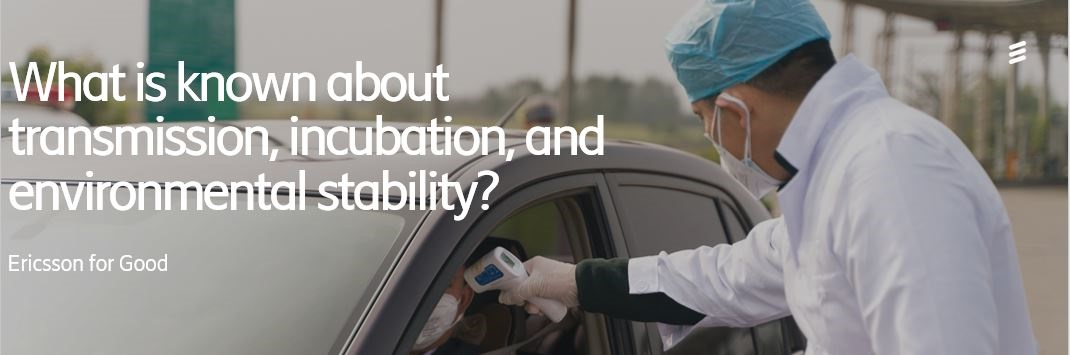


**Note:** This approach was tested against the CORD-19 dataset available on 04/16/2020. As the corpus of papers grows, it is possible that this model will eventually fail to run due to Kaggle's memory limitations. Should this occur, we recommend downloading this notebook and running it locally in an environment with more than 16 GB of RAM.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#1.1-Objectives" data-toc-modified-id="1.1-Objectives-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#1.2-How-it-Works" data-toc-modified-id="1.2-How-it-Works-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>How it Works</a></span></li><li><span><a href="#1.3-Results-Preview" data-toc-modified-id="1.3-Results-Preview-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Results Preview</a></span></li></ul></li><li><span><a href="#2.-Methodology" data-toc-modified-id="2.-Methodology-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Methodology</a></span></li><li><span><a href="#3.-The-Code" data-toc-modified-id="3.-The-Code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Code</a></span><ul class="toc-item"><li><span><a href="#3.1-Preparation" data-toc-modified-id="3.1-Preparation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparation</a></span><ul class="toc-item"><li><span><a href="#3.1.1-Installing-and-Importing-the-Necessary-Python-Packages" data-toc-modified-id="3.1.1-Installing-and-Importing-the-Necessary-Python-Packages-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Installing and Importing the Necessary Python Packages</a></span></li><li><span><a href="#3.1.2-Defining-Useful-Helper-Functions" data-toc-modified-id="3.1.2-Defining-Useful-Helper-Functions-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Defining Useful Helper Functions</a></span></li></ul></li><li><span><a href="#3.2-Acquiring-and-Preprocessing-the-Dataset" data-toc-modified-id="3.2-Acquiring-and-Preprocessing-the-Dataset-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Acquiring and Preprocessing the Dataset</a></span><ul class="toc-item"><li><span><a href="#3.2.1-Downloading-the-CORD-19-Dataset-from-Kaggle" data-toc-modified-id="3.2.1-Downloading-the-CORD-19-Dataset-from-Kaggle-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Downloading the CORD-19 Dataset from Kaggle</a></span></li><li><span><a href="#3.2.2-Extracting-and-Formatting-the-Data-for-all-Papers-in-the-Dataset" data-toc-modified-id="3.2.2-Extracting-and-Formatting-the-Data-for-all-Papers-in-the-Dataset-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Extracting and Formatting the Data for all Papers in the Dataset</a></span><ul class="toc-item"><li><span><a href="#3.2.2.1-Loading-the-Metadata" data-toc-modified-id="3.2.2.1-Loading-the-Metadata-3.2.2.1"><span class="toc-item-num">3.2.2.1&nbsp;&nbsp;</span>Loading the Metadata</a></span></li><li><span><a href="#3.2.2.3-Extracting-Key-Data-from-each-Paper" data-toc-modified-id="3.2.2.3-Extracting-Key-Data-from-each-Paper-3.2.2.2"><span class="toc-item-num">3.2.2.2&nbsp;&nbsp;</span>Extracting Key Data from each Paper</a></span></li><li><span><a href="#Load-the-Data-for-all-the-Papers" data-toc-modified-id="Load-the-Data-for-all-the-Papers-3.2.2.3"><span class="toc-item-num">3.2.2.3&nbsp;&nbsp;</span>Load the Data for all the Papers</a></span></li></ul></li><li><span><a href="#3.2.3-Checkpoint-1" data-toc-modified-id="3.2.3-Checkpoint-1-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Checkpoint 1</a></span></li></ul></li><li><span><a href="#3.3-Cleaning-the-Dataset" data-toc-modified-id="3.3-Cleaning-the-Dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cleaning the Dataset</a></span><ul class="toc-item"><li><span><a href="#3.3.1-Cleaning-the-Paper-Text-Sections" data-toc-modified-id="3.3.1-Cleaning-the-Paper-Text-Sections-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Cleaning the Paper Text Sections</a></span><ul class="toc-item"><li><span><a href="#3.3.1.1-Load-Checkpoint-1" data-toc-modified-id="3.3.1.1-Load-Checkpoint-1-3.3.1.1"><span class="toc-item-num">3.3.1.1&nbsp;&nbsp;</span>Load Checkpoint 1</a></span></li></ul></li><li><span><a href="#3.3.2-Removing-Duplicate-Papers" data-toc-modified-id="3.3.2-Removing-Duplicate-Papers-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Removing Duplicate Papers</a></span></li><li><span><a href="#3.3.3-Cleaning-the-Country-Names" data-toc-modified-id="3.3.3-Cleaning-the-Country-Names-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Cleaning the Country Names</a></span><ul class="toc-item"><li><span><a href="#3.3.3.1-Checkpoint-2" data-toc-modified-id="3.3.3.1-Checkpoint-2-3.3.3.1"><span class="toc-item-num">3.3.3.1&nbsp;&nbsp;</span>Checkpoint 2</a></span></li><li><span><a href="#3.3.3.2-Geographical-Distribution-of-Papers" data-toc-modified-id="3.3.3.2-Geographical-Distribution-of-Papers-3.3.3.2"><span class="toc-item-num">3.3.3.2&nbsp;&nbsp;</span>Geographical Distribution of Papers</a></span></li></ul></li><li><span><a href="#3.3.4-Identifying-and-Removing-Papers-that-are-Outliers" data-toc-modified-id="3.3.4-Identifying-and-Removing-Papers-that-are-Outliers-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Identifying and Removing Papers that are Outliers</a></span><ul class="toc-item"><li><span><a href="#3.3.4.1-Identifying-and-Removing-Papers-with-No-Body-Text" data-toc-modified-id="3.3.4.1-Identifying-and-Removing-Papers-with-No-Body-Text-3.3.4.1"><span class="toc-item-num">3.3.4.1&nbsp;&nbsp;</span>Identifying and Removing Papers with No Body Text</a></span></li><li><span><a href="#3.3.4.2-Removing-Papers-that-Do-Not-Appear-to-be-Relevant-to-the-Corpus-as-a-Whole" data-toc-modified-id="3.3.4.2-Removing-Papers-that-Do-Not-Appear-to-be-Relevant-to-the-Corpus-as-a-Whole-3.3.4.2"><span class="toc-item-num">3.3.4.2&nbsp;&nbsp;</span>Removing Papers that Do Not Appear to be Relevant to the Corpus as a Whole</a></span></li><li><span><a href="#3.3.4.3-Removing-Papers-with-Less-Than-150-Words" data-toc-modified-id="3.3.4.3-Removing-Papers-with-Less-Than-150-Words-3.3.4.3"><span class="toc-item-num">3.3.4.3&nbsp;&nbsp;</span>Removing Papers with Less Than 150 Words</a></span></li><li><span><a href="#3.3.4.4-Checkpoint-3" data-toc-modified-id="3.3.4.4-Checkpoint-3-3.3.4.4"><span class="toc-item-num">3.3.4.4&nbsp;&nbsp;</span>Checkpoint 3</a></span></li></ul></li><li><span><a href="#3.3.5-Identifying-and-Removing-Papers-whose-Primary-Language-is-not-English" data-toc-modified-id="3.3.5-Identifying-and-Removing-Papers-whose-Primary-Language-is-not-English-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Identifying and Removing Papers whose Primary Language is not English</a></span></li></ul></li><li><span><a href="#3.4-Topic-Modelling" data-toc-modified-id="3.4-Topic-Modelling-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Topic Modelling</a></span><ul class="toc-item"><li><span><a href="#3.4.1-Summary-Visualization---LDA-of-papers" data-toc-modified-id="3.4.1-Summary-Visualization---LDA-of-papers-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Summary Visualization - LDA of papers</a></span></li><li><span><a href="#3.4.2->>-PYLDA-Visualization-<<" data-toc-modified-id="3.4.2->>-PYLDA-Visualization-<<-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span><a href="lda_visualization.html" target="_blank">&gt;&gt; PYLDA Visualization &lt;&lt;</a></a></span></li><li><span><a href="#3.4.3-Checkpoint-4" data-toc-modified-id="3.4.3-Checkpoint-4-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Checkpoint 4</a></span></li><li><span><a href="#3.4.4-Summary-Visualization---Common-Terms-in-the-Research-Papers" data-toc-modified-id="3.4.4-Summary-Visualization---Common-Terms-in-the-Research-Papers-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Summary Visualization - Common Terms in the Research Papers</a></span></li></ul></li></ul></li><li><span><a href="#4.-Search-Engine" data-toc-modified-id="4.-Search-Engine-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Search Engine</a></span><ul class="toc-item"><li><span><a href="#4.1-Task-Report" data-toc-modified-id="4.1-Task-Report-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Task Report</a></span><ul class="toc-item"><li><span><a href="#4.1.1-Task-1---Questions" data-toc-modified-id="4.1.1-Task-1---Questions-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Task 1 - Questions</a></span></li></ul></li></ul></li><li><span><a href="#5.-License-Agreements" data-toc-modified-id="5.-License-Agreements-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>License Agreements</a></span><ul class="toc-item"><li><span><a href="#5.1-PSF-LICENSE-AGREEMENT-FOR-PYTHON-3.8.2" data-toc-modified-id="5.1-PSF-LICENSE-AGREEMENT-FOR-PYTHON-3.8.2-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PSF LICENSE AGREEMENT FOR PYTHON 3.8.2</a></span></li><li><span><a href="#5.2-The-3-Clause-BSD-License" data-toc-modified-id="5.2-The-3-Clause-BSD-License-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>The 3-Clause BSD License</a></span></li><li><span><a href="#5.3-NumPy-license" data-toc-modified-id="5.3-NumPy-license-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>NumPy license</a></span></li><li><span><a href="#5.4-GNU-LESSER-GENERAL-PUBLIC-LICENSE" data-toc-modified-id="5.4-GNU-LESSER-GENERAL-PUBLIC-LICENSE-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>GNU LESSER GENERAL PUBLIC LICENSE</a></span></li><li><span><a href="#5.5-The-MIT-License" data-toc-modified-id="5.5-The-MIT-License-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>The MIT License</a></span></li><li><span><a href="#5.6-License-agreement-for-matplotlib-versions-1.3.0-and-later" data-toc-modified-id="5.6-License-agreement-for-matplotlib-versions-1.3.0-and-later-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>License agreement for matplotlib versions 1.3.0 and later</a></span></li><li><span><a href='#5.7-3-clause-license-("BSD-License-2.0",-"Revised-BSD-License",-"New-BSD-License",-or-"Modified-BSD-License")' data-toc-modified-id='5.7-3-clause-license-("BSD-License-2.0",-"Revised-BSD-License",-"New-BSD-License",-or-"Modified-BSD-License")-5.7'><span class="toc-item-num">5.7&nbsp;&nbsp;</span>3-clause license ("BSD License 2.0", "Revised BSD License", "New BSD License", or "Modified BSD License")</a></span></li><li><span><a href="#5.8-Apache-License" data-toc-modified-id="5.8-Apache-License-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Apache License</a></span></li><li><span><a href="#5.9-Geopy-License" data-toc-modified-id="5.9-Geopy-License-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Geopy License</a></span></li></ul></li></ul></div>

# 1. Introduction

With the current COVID-2019 Pandemic, medical professionals, scientists, and technologists are racing to contribute to the efforts to simultaneously create and trial a vaccine, mitigate the spread of infection, and improve the prognosis for those impacted by the virus. The full set of COVID-19 research, combined with related research from previous viral epidemics, is an ever-growing collection of journal articles that serves as a global compilation of the latest relevant knowledge, trial results, studies, and reports.  Having the ability to quickly locate and incorporate critical published data and conclusions in support of innovative research and new diagnostic and surveillance tools is essential for those working to expedite solutions to address the many challenging aspects of the global COVID-19 crisis.

## 1.1 Objectives

This objective of this submission is to address the CORD-19 Challenge by applying automation techniques to synthesize a sizable database of current research into a much more manageable set of relevant knowledge related to multiple aspects of understanding and addressing the issues related to the COVID-19 Pandemic. Access to specific aspects of this data set will enable researchers to pinpoint specific elements of the emerging research that comprises the 59,000+ set of papers in the Kaggle database that focus on COVID-19 and related viruses.  This specific effort intends to offer a means of dramatically  reducing the time to reach answers to key questions being asked today.

This notebook presents code that parses, summarizes, and provides critical insights and visualizations from what would otherwise be an overwhelming corpus of published research. This process begins by identifying journal articles that specifically address the novel Coronavirus Disease, COVID-19, and the underlying virus SARS-Cov-2 (previously known as 2019 n-COV) as these pieces of research present the highest level of relevance and often summarize previous findings from research conducted on related Coronaviruses, other respiratory viruses, and viruses in general. Our specific objective is to extract and present key findings related to the transmission, incubation, and environmental stability of the SARS-Cov-2 / COVID-19.

## 1.2 How it Works

The code in this notebook isolates and presents what are determined to be the most relevant articles for medical professionals, scientists, and technologists who are at the forefront of this battle against COVID-19. [Section 1.3](#1.3-Results-Preview "Results Preview") shows a portion of a search results and explains key fields displayed.

### 1.2.1 General Pros and Cons of our Approach

**Pros**
1.	Fast and targeted search to produce and display a small set of highest relevance papers. 
2.	Generates accurate and relevant answers for specific questions posed. 
3.	This approach functions particularly well in situations where no or limited research papers exist specifically for COVID-19 as it provides the researcher with data reported and conclusions reached for related diseases (such as influenza in this case) that is relevant to the topic selected.

**Cons**
1.	Currently, this approach takes a subset of research papers deemed relevant to the question posed for analysis  As a result, there may be limitations in providing optimal answers; for example, the scope may be confined to comparing properties of two viruses within a single topic scope such as the economic impact of COVID-19 vs. the economic Impact of SARS, which leads to the possibility of a providing a sub-optimal conclusion.
2.	The solution provides an answer for specific questions only (indicated terms).

## 1.3 Results Preview

This section presents sample output of the search engine implemented in [Section 4](#4.-Search-Engine "Search Engine").

Use the following list to help interpret key fields in the sample search results shown in [Figure 1](#Figure_1).

**Note**: All scores are based on a range of 0 to 1 where 0 indicates the paper has no probability of answering the query and 1 indicates the paper has the best probability of answering the query.
- Question: This field displays the question that the search engine is acting on. When the notebook is downloaded, [Section 4](#4.-Search-Engine "Search Engine") provides a dropdown menu that allows the user to select from a list of questions related to this challenge. This interaction is not possible once the notebook has been uploaded to Kaggle.
- Answer: This field displays the best response resulting from the search. The line of text below this field shows the number of research papers that were searched to find the answer. In this example, 1053 research papers were searched.
- Paper URL: This field provides a link to the research paper, if available.
- Top Highlights: This field contains a score that is an indicator of how closely related the best matched research paper is to answering the question. The key sentence, the sentence in the paper the best provides insights on the answer, is high-lighted, and the sentences that appear before and after are provided for context. 
- Paper overall score: A score that indicates how well suited the paper is for answering the query.
- Key sentence score: A score that indicates how well the high-lighted sentence answers the query.
- Summary of Paper: This field contains a code generated summary of the paper.
- List of Entities in Paper: This field provides all of the keywords found in the paper.

<a id='Figure_1'></a>
**Figure 1**  Example Search Engine Results

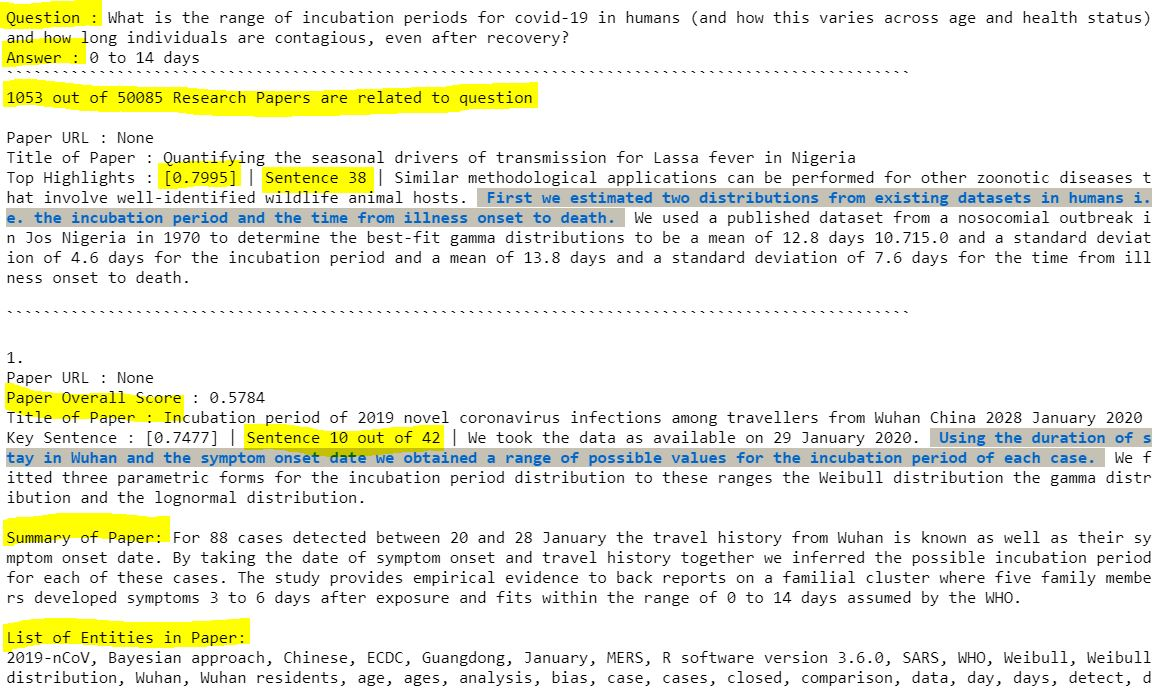

# 2. Methodology

To address the objectives of this notebook, our approach is to model one of the ways we can use a bricks-and-mortar library to perform research. This intuitive approach shapes the results of our search engine, the manner in which we visualize the 51,000+ research paper dataset from Kaggle (our library of documents), and even how we measure whether or not the results are appropriate.

Staying with the bricks-and-mortar library model, there were two options to explore at the beginning. The first option involved requesting the librarian identify papers with keywords before grouping them into topics. The second option involved having the librarian identify topics before searching within these topics for keywords. Each option contains its own pros and cons. The following example scenario illustrates the differences between the two options. 

**Scenario**: A researcher wants to identify the economic impact of COVID-19. Therefore, the keyword is “COVID-19,” and the topic is "economic."

With the first option, the librarian identifies research papers dealing with COVID-19, and returns a collection of papers that cover a wide range of topics, including transmission, environmental stability, and economics. Using the search results, the librarian then does a secondary search on topics using "economics." This gives the researcher the power to not only focus on economics, but to also explore other topics under COVID-19 (e.g., the librarian may choose a keyword other than "economics" for subsequent secondary searches).

With the second option, the librarian first identifies topics (such as economics) and only research papers with the specified topic(s) are identified. This set of papers would contain a variety of keywords. The secondary search using COVID-19 related keywords then returns COVID-19 papers. This allows researchers to explore economic impacts of other diseases or viruses like influenza in subsequent secondary searches. 

The difference between these two approaches only becomes apparent when researching a new and emerging subject. Through the first approach, there exists a possibility that no research papers, or a limited number of research papers exist on COVID-19. Whereas, in the second approach, even though no research papers or a limited number of research papers exist, the alternative of searching for papers with related information (such as research on other diseases or viruses) is available. Due to the potentially limited search results of the first option, we decided to go with the second approach, topic generation before the keyword search.  

LSA, pLSA, LDA, and LDA2Vec are the four most popular topic models. They all work on the same assumptions of each having a mixture of topics and consisting of a collection of words. The construction of a topic model is based on the idea that there are semantic structures in document text that are hidden (or unobserved). Therefore, the purpose of topic modeling is to uncover these hidden or latent variables (called topics) that shape the meaning of a document or dictionary (corpus).
While LDA has several shortcomings, ultimately, LDA was chosen because of the Dirichlet prior on top of the data generating process. This Dirichlet prior gives LDA its probabilistic nature. This allows a research paper’s latent topic to change with respect to the overall library, which is more representative of an ever-changing and ever-growing library.  

[Figure 2](#Figure_2) depicts our overall methodology.

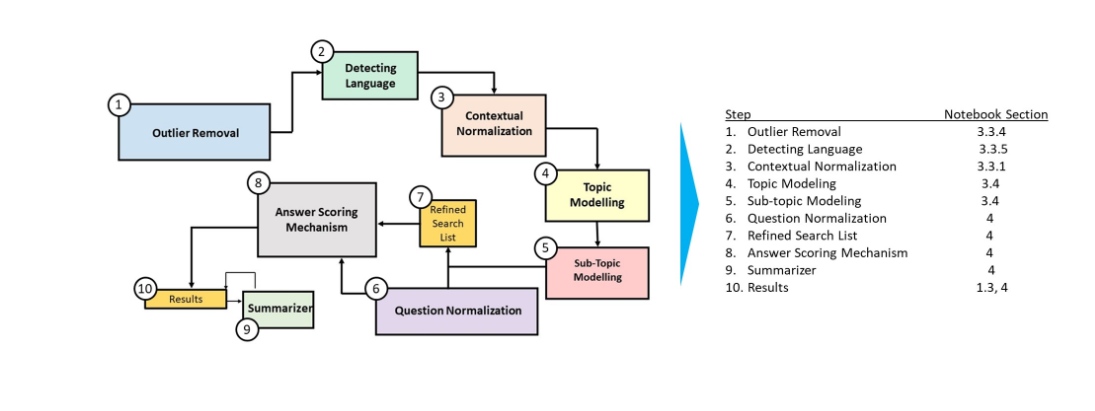

#  3. The Code

The major tasks we performed to develope code for analyzing CORD-19 data to provide insight on what is known about COVID-19 transmission, incubation, and environmental stability consists of the following:

1. Preparation
2. Acquiring and preprocessing the dataset
3. Cleaning the dataset 
4. Topic modeling on the processed dataset
5. Data search engine - Insights on Task questions

## 3.1 Preparation

For the preparation task, required software packages are imported and installed, and helper functions are defined to make the code more readable and efficient.

### 3.1.1 Installing and Importing the Necessary Python Packages

The following code blocks install the necessary Python packages on the system, and import them into the Python environment.

In [ ]:
#!pip install kaggle                   #Install the Kaggle API package (Not necessary since we are in Kaggle)
!pip install cord-19-tools             #Install the COVID-19 Data Tools package
#!pip install plotly                   #Exists in Kaggle already

#!pip install spacy                    #Exists in Kaggle already
!pip install spacy-langdetect

#!pip install pycountry                #Exists in Kaggle already
!pip install geonamescache
!pip install geopy
!pip install reverse_geocoder

#!pip install nltk                     #Exists in Kaggle already

!pip install ktrain
#!pip install --upgrade scikit-learn   #Exists in Kaggle already

#!pip install pyLDAvis                 #Exists in Kaggle already
#!pip install wordcloud                #Exists in Kaggle already

#!pip install torch                    #Exists in Kaggle already
#!pip install transformers             #Exists in Kaggle already
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz

In [ ]:
# Import the required libraries
import os
#import shutil

import pandas as pd
import numpy as np
import re

import cotools as co                   #COVID-19 Data Tools
#from pprint import pprint
import pycountry
import geonamescache
import reverse_geocoder as rg
#import sys

import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from IPython.display import display, HTML
from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#import seaborn as sns
import pyLDAvis
import pyLDAvis.sklearn

%matplotlib inline

#please make sure that sklearn version is 0.22.2.post1
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer 
from sklearn.manifold import TSNE

import spacy
from spacy_langdetect import LanguageDetector
import en_core_sci_lg

from transformers import pipeline

import gc
import nltk
#from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')

In [ ]:
pd.options.mode.chained_assignment = None

### 3.1.2 Defining Useful Helper Functions

The following two helper functions are used as part of the code.

```log_progress()``` uses the *ipwidgets* Python package to create and display a progress bar which gives the user running the notebook an indication of the progress of code execution for certain portions of the notebook where this function is called.


```process_text()``` uses the *spaCy* package natural language processing capabilities to clean and lemmatize an input text string.  The function creates a spaCy "Doc" object from the input string, which is a list of tokens that break down the string into its constituent parts; e.g., individual words, spaces, punctuation marks, and lemmas corresponding to each word. It then runs through the tokens, screens out punctuation, stop words, and pronouns, and returns a list of the lemmas corresponding to each remaining word.

In [ ]:
def log_progress(sequence, every=None, size=None, name='Items'):
    
    '''
    Use the ipwidgets package to display a progress bar to give the user an indication
    of the progress of code execution for certain portions of the notebook.
    This function is intended to be used in the definition of a for loop to indicate
    how far execution has gotten through the object being iterated over in the for loop.

    Inputs: sequence - contains the for loop iteration (e.g., list or iterator)
            every (integer) - number of steps to display

    Outputs:  displays the progress bar in the notebook
              yield record  - returns the current iteration object back to the calling for loop
    
    '''
    
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    # Determine the parameters for the progress bar based on the function inputs
    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'
    
    # Instantiate and display the progress bar        
    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)
    
    # Update the progress bar state at each iteration of the for loop using this function
    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
                    
            # return the current iteration object, preserving the state of the function
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )
        
        

def process_text(text):
    
    '''
    Use the spaCy library natural language processing capabilities to clean an input text, 
    in string format, for punctuation, stop words, and lemmatization.

    Input:  text - a string to clean and lemmatize

    Output  a modified version of the input string that has been cleaned by removing 
            punctuation, stop words, and pronouns, and has had the remaining words 
            converted into corresponding lemmas
            
    '''
    
    # Create a spaCy "Doc" object from the input text string.
    doc = nlp(text.lower())
    
    result = [] # list that will contain the lemmas for each word in the input string
    
    for token in doc:
        
        if token.text in nlp.Defaults.stop_words:   #screen out stop words
            continue
        if token.is_punct:                          #screen out punctuations
            continue
        if token.lemma_ == '-PRON-':                #screen out pronouns
            continue
        
        result.append(token.lemma_)
    
    # Return the lemmatized version of the cleaned input text string
    return " ".join(result)

## 3.2 Acquiring and Preprocessing the Dataset

In this step, downloading the CORD-19 dataset and extracting and formatting the data are explained.

### 3.2.1 Downloading the CORD-19 Dataset from Kaggle

**ATTENTION**
The need to download the CORD-19 dataset from Kaggle is applicable only if this notebook is downloaded and run outside of Kaggle. If this is the case, follow the instructions on the Kaggle site. 

If wanting to write code for downloading the dataset, the following steps can be used as guidance:
1. Import the Kaggle API
2. Set the local directory where you want to download the dataset
3. Set the Kaggle account credentials, and establish an authenticated Kaggle API instance.
4. Download the CORD-19 Research Challenge dataset using the Kaggle API method

### 3.2.2 Extracting and Formatting the Data for all Papers in the Dataset

We can now load, extract, and reformat the data for the papers into a format suitable for further analysis. The raw data for the CORD-19 Research Challenge is accessible on the Kaggle site
at the following path:  "/kaggle/input/CORD-19-research-challenge". 

In addition, for storing the formatted data, we will use "/kaggle/working/".

#### 3.2.2.1 Loading the Metadata

The *metada.csv* file, located in the **Input** directory, contains useful summary information about each article in the dataset. The information provided for each paper includes (but is not limited to) the following:

* title
* license under which the paper is published
* abstract text
* publication date
* authors
* publishing journal
* whether the data includes the full text of the paper

We use metadata to extract some additional information not found in the JSON files for each paper. The follow code reads in the *metadata.csv* file and converts it into a *pandas* DataFrame for further processing.

In [ ]:
# Set the path where the raw data is
data_dir = '/kaggle/input/CORD-19-research-challenge'

# Set the current working directory path to where the raw data is
os.chdir(data_dir)

# Set the path where the formatted data will be stored
output_dir = '/kaggle/working/'

# Read in the metadata.csv file as a pandas DataFrame
metadata_information = pd.read_csv('metadata.csv')

#### 3.2.2.2 Creating the Preprocessed Dataset 

From the output of the metadata_information.shape method shown below, we see that the metadata file has information on 51078 papers, but the raw data in the subdirectories includes JSON files for 59,311 papers. Thus, not all the papers in raw data are present in the metadata file. For our analysis, we will use the papers that have JSON files, as this should provide more contextual understanding and answers for researchers.
**Note**: 51,078 indicates the number of rows in the resulting output file while 18 represents the number of columns. Each row represents a paper and each column represents the metadata associated with that paper.

In [ ]:
metadata_information.shape

#### Extracting Relevant Papers based on Date

In order to save memory, we include the option here to filter for papers published after a specified date. The function below, ```is_date()```, takes a string as input and uses the *dateutil* package to see if the string can be interpreted as a date. The function returns "True" if it can; "False" otherwise.

The code block following the ```is_date()``` function then takes a date as a string input (our default value is "2019-12-01"), and then identifies the IDs of from the metadata of those papers that were published after this date. To set a specific date, simply modify the "filter_date" variable appropriately, or enter a non-valid date string to disable this filtering altogether. The result of this code block, "paper_id_list", is the list of IDs for papers published after the specified date (or all papers if the filtering is disabled). In addition, there is the ability to specify that we want papers that have already been published in journals. If set to 'Yes', the code below will also filter for those papers.

**Note:** In the case of COVID-19, we would recommend that the search includes papers that have yet to be published in journals. Since this is a relatively new research area, it is possible that there are many papers of interest that have yet to be formally published in an established journal; for example, there may be many relevant papers from conference proceedings in the current dataset. Therefore, we recommend ```from_journal_sources_only``` to be set as 'No'.

In [ ]:
def is_date(string, fuzzy=False):
    
    '''
    Checks if string input can be interpreted as a date
    
    Input:  string - string to check whether it is a valid date
 
    Output:  boolean - True if string is a valid date; False otherwise 
 
    '''
    
    from dateutil.parser import parse
    
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [ ]:
#print('Please input in the earliest date to filter the research paper (yyyy-mm-dd)!')
#filter_date = str(input())
#print('Would you like to only consider research papers published in journals (Y/N)?')
#from_journal_sources_only = str(input())

# Modify this date per user requirements, or enter a non-valid date string to disable publication date filtering
filter_date = '2019-12-01'
from_journal_sources_only = 'No'

# paper_id_list is a list of the IDs for all papers published after the specified date
# (or all papers if the date filtering is disabled).

if is_date(filter_date) == True and from_journal_sources_only == 'Yes':
    paper_id_list = metadata_information[(metadata_information['publish_time'] >= filter_date) & (metadata_information['journal'].notnull())].dropna(subset=['sha'])['sha'].tolist()

elif is_date(filter_date) == True and from_journal_sources_only == 'No':
    paper_id_list = metadata_information[metadata_information['publish_time'] >= filter_date].dropna(subset=['sha'])['sha'].tolist()

elif is_date(filter_date) == False and from_journal_sources_only == 'Yes':
    paper_id_list = metadata_information[metadata_information['journal'].notnull()].dropna(subset=['sha'])['sha'].tolist()
    
else:
    paper_id_list = metadata_information['sha'].tolist()

#### 3.2.2.3 Extracting Key Data from each Paper

Each paper in the dataset is represented by a JSON file, and is located in one of four subdirectories under the "/kaggle/input/CORD-19-research-challenge" directory, depending on how the article is licensed:

- "comm_use_subset"
- "noncomm_use_subset"
- "custom_license"
- "biorxiv_medrxiv"

For each paper, we want to extract the following data:

- paper ID
- url link
- publication date
- title
- abstract text
- body text
- primary location and country for the author(s)

Note that the paper url link and the publication date are contained in the dataset metadata, while the rest of the items are in the individual paper JSON files. We will get url line and publication date from the metadata, and then merge these items with the rest of the data in a single DataFrame.

The two functions below extract this data, and then format it into a single combined DataFrame which contains the key information that we need for the papers.

The ```create_library()``` function reads in the JSON data for each paper from each subdirectory (only those published after the specified date, if date filtering is enabled). The detailed information for each paper is formatted into a Python dictionary, which in turn is appended to a list - the result being a list of dictionaries, where each dictionary describes one paper.

The ```data_creation()``` function uses the list of dictionaries from the ```create_library()``` function, extracts the data items listed above, and combines this data for each paper into a single combined DataFrame. In addition, it retrieves the url line and publication date for each paper from the metadata DataFrame we created previously, and then merges this into to the combined DataFrame.

##### Extract the Primary Location, and Country for the Authors of each Paper

One of the items in the dictionary for each paper contains information about the paper title and author. It is referenced by the key, "metadata". The value of this item is itself a dictionary, and one of the items in the "metadata" dictionary is a list of dictionaries which provides complete information on the author(s) of the paper (one dictionary for each author). This item is referenced by the key, "authors". Each author dictionary contains entries for:

- first name
- middle name
- last name
- name suffix
- author affiliation ((institution, location, country, etc.)
- email address

The primary location and country (i.e., this information for the first author) for the author(s) of each paper is contained in the "affiliation" item of the dictionary for each author. Part of the ```data_creation()``` function extracts the author information from the "metadata" dictionary, examines the "affiliation" data structure for each author, and extracts the location and country information for the first author (or the first author that has valid information for these items). These items for each paper are then added to the combined DataFrame. 

In [ ]:
def create_library(list_of_folders, list_of_papers = paper_id_list):

    '''
    Read JSON files for each paper from a list of subdirectories, and convert the JSON data for each paper
    into a Python dictionary.

    Inputs:  list_of_folders (list) - a list of subfolder names (strings) where the raw paper data is found
             list_of_papers (list) - list of IDs for the target paper from which we want to extract the
                                     relevant data for further analysis
    Output:  internal_library (list) - list of dictionaries, where each dictionary contains the detailed
                                       data for one paper
    
    '''
    
    import json
    
    internal_library = []     # list of dictionaries for the papers; each dictionary describes one paper 

    # Iterate through each subfolder with the raw paper data; use the log_progress()
    # function to give the user an indication of execution progress. 
    for i in log_progress(list_of_folders, every = 1):

        # Check two different sub-subfolders under each subfolder in the list of folders to find the
        # papers - ".../pdf_json" and ".../pmc_json".
        # For each paper, convert the JSON file into a Python dictionary (data{}).
        # Add this dictionary to the list of dictionaries for all papers (internal_library[])
        try:

            pdf_file_path = data_dir + '/' + i + '/' + i + '/pdf_json'
            pdf_file_list = [i for i in os.listdir(pdf_file_path) if i.split('.')[0] in list_of_papers]
            print('There are {a} papers in the {c} group after {b}.'.format(a = len(pdf_file_list), b = filter_date, c = str(i + str('_pdf'))))

            for each_file in pdf_file_list:
                file_path = data_dir + '/' + i + '/' + i + '/pdf_json/' + each_file

                with open(file_path) as f:
                    data = json.load(f)

                internal_library.append(data)

        except:
            continue

        try:

            pmc_file_path = data_dir + '/' + i + '/' + i + '/pmc_json'
            pmc_file_list = [i for i in os.listdir(pmc_file_path) if i.split('.')[0] in list_of_papers]
            print('There are {a} papers in the {c} group after {b}.'.format(a = len(pmc_file_list), b = filter_date, c = str(i + str('_pmc'))))

            for each_file in pmc_file_list:
                file_path = data_dir + '/' + i + '/' + i + '/pmc_json/' + each_file

                with open(file_path) as f:
                    data = json.load(f)

                internal_library.append(data)

        except:
            continue
            
    return internal_library



def data_creation(list_of_folders, metadata, date = filter_date, list_of_papers = paper_id_list):
    
    '''
    Extract the key data for each paper and create a combined DataFrame with this information
   
    Inputs: list_of_folders (list) - a list of subfolder names (strings) where the raw paper data is found
            metadata (DataFrame) - metadata information on all papers
            date (string) - publication date; only include papers published after this date
            list_of_papers (list) - list of IDs for the target papers from which we want to extract the
                                relevant data for further analysis
    Outputs: test_df (DataFrame) - DataFrame containing the key data for each paper  
    
    '''
    
    # Use the create_library() function above to read the raw JSON data and create a list 
    # of dictionaries (internal_library). Each dictionary describes each paper in the raw data.
    # Note that we are using the date-filtered list of paper IDs (paper_id_list) to target
    # only those papers we want based on publication date (if the filtering is enabled).
    internal_library = create_library(list_of_folders = selected_folders, list_of_papers = paper_id_list)

    title_list = []          # list of paper titles (list of strings)
    abstract_list = []       # list of paper abstracts (list of strings)
    text_list = []           # list of paper full texts (list of strings)

    # Extract title, abstract text, and body text for each paper
    for i in list(range(0, len(internal_library))):

        # Get the title from the "metadata" dictionary for each paper. The "metatdata" dictionary
        # for each paper is a dictionary that contains title and author information.        
        title_list.append(internal_library[i].get('metadata').get('title'))

        # Use cord-19-tools package functions co.abstract() and co.text() to extract
        # abstract text and body text from the paper dictionary        
        try:
            abstract_list.append(co.abstract(internal_library[i]))
        except:
            abstract_list.append('No Abstract')

        text_list.append(co.text(internal_library[i]))

        
    # Extract paper ID information
    paper_id = [i.get('paper_id') for i in internal_library]   # list of the ID for each paper

    # Extract the location and country that published the research paper
    primary_location_list = []      # list of the primary locations for the authors of each paper
    primary_country_list = []       # list of the primary countries for the authors of each paper

    
    # Extract list of "metadata" dictionaries for each paper
    internal_metadata = [i['metadata'] for i in internal_library]

    # Extract the primary location and country for the authors of each paper
    # individual_paper_metadata is the 'metadata' dictionary for one paper
    for individual_paper_metadata in internal_metadata:

        # Extract the list of author dictionaries for the current paper (one dictionary per author)
        authors_information = individual_paper_metadata.get('authors')

        if len(authors_information) == 0:
            primary_location_list.append('None')
            primary_country_list.append('None')

        else:
            location = None
            country = None
            i = 1

            # Find the first author of the paper with valid data for location and country,
            # extract this information, and add to the respective lists for all the papers
            while location == None and i <= len(authors_information):

                if bool(authors_information[i-1].get('affiliation')) == True:

                    location = authors_information[i-1].get('affiliation').get('location').get('settlement')
                    country = authors_information[i-1].get('affiliation').get('location').get('country')

                i += 1

            primary_location_list.append(location)
            primary_country_list.append(country)
                
    
    # Take all the information extracted for each paper and merge it into one combined DataFrame    
    
    # Create a DataFrame with one column - the paper ID for each paper
    index_df = pd.DataFrame(paper_id, columns =  ['paper_id'])

    # Create a DataFrame with two columns - the primary location and country of the authors for each paper
    geographical_df = pd.DataFrame(primary_location_list, columns = ['Location'])
    geographical_df['Country'] = primary_country_list

    # Create a DataFrame with three columns - title, abstract text, and body text for each paper
    paper_info_df = pd.DataFrame(title_list, columns = ['Title'])
    paper_info_df['Abstract'] = abstract_list
    paper_info_df['Text'] = text_list
    
    # Concatenate the above three DataFrames into a single combined DataFrame
    combined_df = pd.concat([index_df, geographical_df, paper_info_df], axis = 1)
    
    # Extract sha (paper ID), abstract text, url, and publication date for each paper from the metadata
    # DataFrame passed as input to this function
    part_1 = metadata[['sha', 'abstract', 'url', 'publish_time']]

    # Merge the information from the metadata DataFrame with the DataFrame with the raw paper data
    test_df = combined_df.merge(part_1, left_on = ['paper_id'], right_on = ['sha'], how = 'left')
    test_df.drop(['sha'], axis = 1,inplace = True)
    test_df = test_df[['paper_id', 'url', 'publish_time', 'Location', 'Country', 'Title', 'Abstract', 'abstract', 'Text']]
    
    # In the event where the JSON's abstract is null but there is an abstract in the 
    # metadata, make the substitution
    test_df['Abstract'] = np.where(test_df['Abstract'] == '', test_df['abstract'], test_df['Abstract'])
    test_df.drop(['abstract'], axis = 1, inplace = True)
    
    gc.collect()
    
    return test_df

With the above two functions defined, the following two lines of code define the list of of subfolder names under "/kaggle/input/CORD-19-research-challenge" where the raw paper data is found, and then call the data_creation() function to extract the desired data from each paper and and create a single, combined DataFrame, "test_df".

In [ ]:
# Define as a list the names of all the subdirectories under the "/kaggle/input/CORD-19-research-challenge"
# directory where the dataset files are stored
selected_folders = ['comm_use_subset', 'noncomm_use_subset', 'custom_license', 'biorxiv_medrxiv']

# Call the data_creation() function to extract the desired data from each paper and create a single,
# combined DataFrame, test_df
test_df = data_creation(list_of_folders = selected_folders, metadata = metadata_information)

### 3.2.3 Checkpoint 1

At this point, we want to save our combined DataFrame as a .csv file, "/kaggle/working/Checkpoint 1.csv". We also want to delete the variables we no longer need to reclaim some memory space before continuing code execution.

In [ ]:
test_df.to_csv(output_dir + 'Checkpoint_1.csv', index = False)

In [ ]:
# Cleaning up after each section to save space
del paper_id_list
del metadata_information
del selected_folders

import gc
gc.collect()

## 3.3 Cleaning the Dataset

Now that we have extracted the relevant raw data for all the papers and reformatted it into a single *pandas* DataFrame, we need to do some additional cleaning of the dataset. This includes:

- removing unnecessary or unhelpful characters and words from the paper text
- removing duplicate papers
- making the country names uniform English names
- removing papers that are outliers
- removing papers who primary language is not English

### 3.3.1 Cleaning the Paper Text Sections

The text extracted for the paper JSON files is somewhat dirty. The function ```cleaning_dataset()``` below takes as input a DataFrame, and a list of columns in that DataFrame to clean, and cleans text of those columns. Specifically, it:

- fills holes (i.e., null values) in the DataFrame with the string, "No Information"
- removes unnecessary garbage characters and white space
- removes references and annotations (i.e., [1], (1), etc.)
- removes "figure X.X" references 

Additionally for the abstract text of each paper, it removes unnecessary starting words, such as "background" or "abstract", and also counts the number of words in each abstract and adds a column to the DataFrame which contains the number of words in the abstract for each paper.


#### 3.3.1.1 Load Checkpoint 1

If for some reason you want to reload the Checkpoint 1 version of the "test_df" DataFrame from the file, use the following code:

```test_df = pd.read_csv(output_dir + 'Checkpoint1.csv')```

In [ ]:
def cleaning_dataset(dataset, columns_to_clean):
    
    '''
    Clean text of specified columns in DataFrame

    Inputs:  dataset (DataFrame) - Dataframe to clean
             columns to clean (list) - list of columns in the DataFrame for which we want to clean the text

    Output:  cleaned DataFrame 
    
    '''    
    
    # each_column is one of the defined columns from the DataFrame
    # Use the log_progress() helper function defined above to indicate the progress of the execution
    for each_column in log_progress(columns_to_clean, every = 1):

        # Fill in any null text items with "No Information"
        dataset[each_column] = dataset[each_column].fillna('No Information')

        # Remove square-bracketed references (i.e., [1])
        dataset[each_column] = dataset[each_column].apply(lambda x: re.sub(r'\[.*?]', r'', x))

        # Remove parenthesis references (i.e., (1))
        dataset[each_column] = dataset[each_column].apply(lambda x: re.sub(r'\((.*?)\)', r'', x))

        # Remove garbage characters
        dataset[each_column] = dataset[each_column].apply(lambda x: re.sub(r'[^a-zA-z0-9.%\s-]', r'', x))

        # Remove unnecessary white space
        dataset[each_column] = dataset[each_column].apply(lambda x: re.sub(r' +', r' ', x))

        # Remove unnecessary white space at the end of the text section
        dataset[each_column] = dataset[each_column].apply(lambda x: x.rstrip())

        # Remove white space before punctuation marks
        dataset[each_column] = dataset[each_column].apply(lambda x: re.sub(r'\s([?.!"](?:\s|$))', r'\1', x))

        
    cleaned_abstract = []     # list of cleaned abstracts for all the papers
    abstract_count = []       # list of the word counts for each paper abstract

    # Clean up abstracts as abstracts may contain unnecessary starting words like 'background' or 'abstract'
    # Count the words in each cleaned abstract and add the list of abstract word counts for each paper to
    # the test_df Data Frame
    #
    # i is the abstract text (string) for one paper
    for i in dataset['Abstract']:

        if i.split(' ')[0].lower() == 'background' or i.split(' ')[0].lower() == 'abstract':
            cleaned_abstract.append(' '.join(i.split(' ')[1:]))
            abstract_count.append(len(i.split(' ')[1:]))

        else:
            cleaned_abstract.append(i)
            abstract_count.append(len(i.split()))

    dataset['Abstract'] = cleaned_abstract
    dataset['Abstract Word Count'] = abstract_count

    # Removing the words figure X.X from the passages because it contributes no meaning
    fig_exp = re.compile(r"Fig(?:ure|.|-)\s+(?:\d*[a-zA-Z]*|[a-zA-Z]*\d*|\d*)", flags=re.IGNORECASE) 
    dataset['Text'] = [(re.sub(fig_exp, '', i)) for i in test_df['Text']]

    # Remove other instances of poor references and annotations
    poor_annotation_exp_1 = re.compile(r'(\d)\s+(\d]*)', flags = re.IGNORECASE)
    dataset['Text'] = [(re.sub(poor_annotation_exp_1, '', i)) for i in test_df['Text']]

    poor_annotation_exp_2 = re.compile(r'(\d])*', flags = re.IGNORECASE)
    dataset['Text'] = [(re.sub(poor_annotation_exp_2, '', i)) for i in test_df['Text']]
    
    gc.collect()
    
    return dataset

The following two lines of code define the text columns in the "test_df" DataFrame that we want to clean ("Title", "Abstract", and "Text"), and then call the cleaning_data set function with "test_df" as the input data frame and the defined columns as the columns to clean.

In [ ]:
text_columns = ['Title', 'Abstract', 'Text']
test_df = cleaning_dataset(dataset = test_df, columns_to_clean = text_columns)

### 3.3.2 Removing Duplicate Papers

If we examine some characteristics of the "Abstract" column of the "test_df" DataFrame, we notice that there appear to be a significant number (~700+) of duplicate abstracts in the data set. One possible reason for this is that a given paper may have been published in more than one journal. We obviously do not want such duplicates. The following code looks for duplicated papers, indicated either by duplicate abstract text or duplicate full text, and removes the corresponding rows from the DataFrame. In the output below we see that dropping the apparent duplicates has effectively eliminated the number of non-unique texts in our cleaned dataset.

In [ ]:
test_df['Abstract'].describe(include='all')

In [ ]:
test_df.drop_duplicates(['Abstract', 'Text'], inplace = True)

In [ ]:
test_df['Text'].describe(include = 'all')

> ### 3.3.3 Cleaning the Country Names

The country names, as extracted from the raw data, are not necessarily the uniform English names - they sometimes are abbreviations, misspellings, the name in a different language, include garbage characters, etc. We want to clean up these country name strings, and also update the country names so that they match the ISO 3166 standard names. The following code cleans up the country fields and updates the names to the ISO standard using the *pycountry* Python package.

In [ ]:
# Make sure the country name entries in the DataFrame are strings
test_df['Country'] = test_df['Country'].astype(str)

# Extract the country name list from the DataFrame so we can work with it
country_list = test_df['Country'].tolist()

# Clean up the country names

# Substitute "None" for any null entries
# new_items is now a temporary list of the country names
new_items = ['None' if x == 'nan' else x for x in country_list]

# Remove garbage characters, brackets and parentheses, extra white space, etc.
new_items = [re.sub(r'\[.*?]', r'', x) for x in new_items]
new_items = [re.sub(r'\((.*?)\)', r'', x) for x in new_items]
new_items = [x.split(',')[0] for x in new_items]
new_items = [re.sub(r'[^a-zA-z\s-]', r'', x) for x in new_items]
new_items = [re.sub(r' +', r' ', x) for x in new_items]
new_items = [re.sub(r'\[\[|\]\]', '', x) for x in new_items]
new_items = [x.strip('[').strip(']') for x in new_items]

# Ensure that the country names are the uniform, proper English names for each country
new_items = ['mexico' if x.lower() == 'mxico' else x for x in new_items]
new_items = ['brazil' if x.lower().rstrip() == 'brasil' else x for x in new_items]
new_items = ['china' if x.lower() == 'china-japan' or x.lower() == 'prchina' or x.lower() == 'prc' or x.lower() == 'china-australia' else x for x in new_items]
new_items = ['united kingdom' if x.lower() == 'united-kingdom' else x for x in new_items]
new_items = ['tunisia' if x.lower() == 'tunisie' else x for x in new_items]
new_items = ['russia' if x.lower() == 'runion' or x.lower() == 'ussr' else x for x in new_items]
new_items = ['senegal' if x.lower() == 'sngal' else x for x in new_items]
new_items = ['spain' if x.lower() == 'espaa' else x for x in new_items]
new_items = ['slovakia' if x.lower() == 'czechoslovakia' else x for x in new_items]
new_items = ['usa' if x.lower() == 'ljsa' else x for x in new_items]
new_items = ['germany' if x.lower() == 'w-germany' or x.lower() == 'deutschland' else x for x in new_items]
new_items = ['belgium' if x.lower() == 'belgique' else x for x in new_items]
new_items = ['slovenia' if x.lower() == 'yugoslavia' else x for x in new_items]
new_items = ['italy' if x.lower() == 'italien' else x for x in new_items]
new_items = ['emirates' if x.lower() == 'uae' else x for x in new_items]
new_items = ['india' if x.lower() == 'india-' else x for x in new_items]

# Change to "None" any entries that are not actually names of a country
new_items = ['None' if x.lower() == 'umrs' or x.lower() == 'frg' or x.lower() == 'university' or x.lower() == 'maroc' or x.lower() == 'universidade' or x.lower() == 'ucbl' or x.lower() == 'telephone' or x.lower() == 'mcgovern' or x.lower() == 'school' or x.lower() == 'professor' else x for x in new_items]

In [ ]:
country_list = []    # list of cleaned and ISO standard country names for all the papers

# Use the pycountry package to find the official ISO standard country names for each
# entry in the temporary list of cleaned country names (new_items). Once the list
# is updated with the standard names, replace this column in the text_df Data Frame
#
# new_items is a temporary list of the cleaned country names
# Use the log_progress() helper function defined above to indicate the progress of the execution
for i in log_progress(new_items, every = 1):
    
    try:
        if len(i.split()) > 1:
            list_to_try = i.split()

            for x in list_to_try:
                try:
                    country = pycountry.countries.search_fuzzy(x)[0].name

                except:
                    continue

            country_list.append(country)

        else:
            country = pycountry.countries.search_fuzzy(i)[0].name
            country_list.append(country)
            
    except:
        country_list.append('None')
        
test_df['Country'] = country_list

#### 3.3.3.1 Checkpoint 2

Before continuing, we save our current version of the "test_df" DataFrame as "/kaggle/working/Checkpoint 2.csv", and reclaim some memory space by deleting variables we no longer need.

In [ ]:
test_df.to_csv(output_dir + 'Checkpoint_2.csv', index = False)

In [ ]:
# Cleaning up after each section to save space
del text_columns
del country_list
del new_items

gc.collect()

#### 3.3.3.2 Geographical Distribution of Papers

Now that we have a reasonably cleaned dataset, we want to examine the geographical distribution of where the papers originate. This will give a view of where in the world the most research on COVID-19 and related coronaviruses is being done currently, based on the latest dataset.

The following code examines the data and counts the number of papers by country. The graphic below displays the results.

In [ ]:
graphing_data = pd.DataFrame(test_df.groupby(['Country']).count()['paper_id']).reset_index()

data = dict (type = 'choropleth',
             locations = graphing_data['Country'],
             locationmode = 'country names',
             colorscale = 'viridis', reversescale = True,
             z = graphing_data['paper_id'])

map = go.Figure(data=[data])

map.update_layout(
    title_text = 'Break down of Research Papers by Countries',
)

map.show()

The visualization above shows the number of articles published by country. To view the number of articles published by a particular country, move the cursor over the country's location on the map. If a country is not readily visible in the viewing pane, you can scroll to other parts of the map by right-clicking and holding on the map while moving the cursor to scroll to other parts of the map. Countries with no papers are gray.

The visualization shows that the top countries in terms of the most papers, based on the current dataset, are Italy, followed by China, and then the US.

The following code looks at the United States specifically, and counts the number of papers by state. The vizualization below displays those results.

In [ ]:
# Use geonamescache Python library to get city names, their longitude and latitude coordinates, and map
# the cities to their respective states.
#
geoname = geonamescache.GeonamesCache()
global_city_dictionary = geoname.get_cities()

# List of US city names
us_cities_list = [global_city_dictionary[code]['name'] for code in list(global_city_dictionary.keys()) if global_city_dictionary[code]['countrycode'] == 'US']

# List of longitudes for each city
us_cities_lng_list = [global_city_dictionary[code]['longitude'] for code in list(global_city_dictionary.keys()) if global_city_dictionary[code]['countrycode'] == 'US']

# List of latitudes for each city
us_cities_lat_list = [global_city_dictionary[code]['latitude'] for code in list(global_city_dictionary.keys()) if global_city_dictionary[code]['countrycode'] == 'US']



def get_states(longitude, latitude):
    
    '''
    Return a list of US states corresponding to input lists of longitude and latitude coordinates

    Inputs:  longitude (list) - list of longitude coordinates
             latitude (list) - list of corresponding latitude coordinates

    Outputs: us_states (list) - list of US states corresponding to longitude and latitude coordinates

    '''
    
    coord_list = list(zip(latitude, longitude))     # list of longitude-latitude coordinate pairs
    
    # Use reverse_geocoder Python package to get location information (closest city/town, 
    # country, US state, etc.) from longitude and latitude coordinates.
    # The search() method returns a dictionary with the location information for each set of 
    # coordinates in the list. If the location is in a US state, the "admin1" dictionary
    # item should have the state name.
    results = rg.search(coord_list)
    
    us_states = []
            
    for i in results:
        try:
            state = i['admin1']     # retrieving state information
        except:
            state = ''              # return empty string if there is no information
        
        us_states.append(state)
    
    return us_states


# Call the above get_states() function to get the list of states corresponding to the list
# of US city longitude and latitude coordinates
us_states_list = get_states(us_cities_lng_list, us_cities_lat_list)

# Create dictionary mapping for US city names to states
city_to_state = {}
for city, state in zip(us_cities_list, us_states_list):
    if state:
        city_to_state[city] = state

In [ ]:
del geoname; del global_city_dictionary
del us_cities_list; del us_cities_lng_list; del us_cities_lat_list; del us_states_list

In [ ]:
# Extract rows from test_df for which the paper "Country" is the US
graphing_data_2 = test_df[test_df['Country'] == 'United States']

# For a paper where the primary author country is in the US, the "Location" column should have 
# the city name and state name or abbreviation
location_list = [city_to_state.get(i) for i in graphing_data_2['Location']]
graphing_data_2.loc[:,'Location'] = location_list

# Count the papers by location (US state)
graphing_data_2 = graphing_data_2.groupby(['Location']).count()['paper_id'].reset_index()

# Create a dictionary mapping of US state names to their postal abbreviations
state_dict = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ', 'Arkansas': 'AR',
              'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
              'Delaware': 'DE', 'District of Columbia': 'DC',
              'Florida': 'FL',
              'Georgia': 'GA', 'Guam': 'GU',
              'Hawaii': 'HI',
              'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
              'Kansas': 'KS', 'Kentucky': 'KY',
              'Louisiana': 'LA',
              'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
              'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP',
              'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
              'Pennsylvania': 'PA', 'Puerto Rico': 'PR',
              'Rhode Island': 'RI',
              'South Carolina': 'SC', 'South Dakota': 'SD',
              'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
              'Vermont': 'VT', 'Virgin Islands': 'VI', 'Virginia': 'VA',
              'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Create the graph that shows paper counts by US state
graphing_data_2['Code'] = graphing_data_2['Location'].map(state_dict)

fig = go.Figure(data=go.Choropleth(
    locations=graphing_data_2['Code'],     # spatial coordinates
    z = graphing_data_2['paper_id'],       # data to be color-coded
    locationmode = 'USA-states',           # set of locations match entries in `locations`
    colorscale = 'viridis', reversescale = True,
))

fig.update_layout(
    title_text = 'Break down of Research Papers by US States',
    geo_scope='usa',                       # limited map scope to USA
)

fig.show()

The visualization above shows the number of articles published by state (United States). To view the number of articles published by a particular state, move the cursor over the state's location on the map. States with no papers published are gray.

The visualization shows that the top states in the US in terms of the most papers, based on the current dataset, are Texas, followed closely by Pennsylvania, Maryland, and New York. The next lower group includes California, Indiana, and North Carolina.

Before continuing on with identifying and removing papers that are outliers, we pause again to delete variables we no longer need and reclaim some memory space.

In [ ]:
#Cleaning up after each section to save space
del state_dict
del city_to_state
del location_list
del map; del graphing_data
del fig; del graphing_data_2

gc.collect()

### 3.3.4 Identifying and Removing Papers that are Outliers

To further clean the dataset, we want to remove any papers that would be classified as outliers. 
An outlier would be a paper that:

- has no text
- has text that does not appear to be relevant to the corpus as a whole, based on TF-IDF scoring
- has less than 150 words of text

The following code identifies and removes outlier papers based on these criteria.

#### 3.3.4.1 Identifying and Removing Papers with No Body Text

The first step is straightforward - we simply use the *pandas* ```.dropna()``` method to drop any papers that have a null value in the "Text" column (paper full text) of our DataFrame.

In [ ]:
test_df.dropna(subset = ['Text'], inplace = True)

#### 3.3.4.2 Removing Papers that Do Not Appear to be Relevant to the Corpus as a Whole

To identify papers that do not appear to be relevant to the corpus as a whole - i.e., research on COVID-19 and related coronaviruses - we perform TF-IDF analysis, using trigrams, across all the paper text. Once we have the corpus vocabulary (features) and TF-IDF scores, we use t-SNE dimensionality reduction to compare the TF-IDF paper scores and highlight papers with scores that significantly differ from those of the main body of papers. A significant difference in TF-IDF score indicates that the content of the paper is not that closely related to that of the main body of papers.

The ```dimension_reduction()``` function below uses the *scikit-learn* ```TfidfVectorizer``` class to extract trigrams (features) and and compute TF-IDF scores for the text of all the papers in the dataset. Since the number of features across the papers may become quite large, the code then uses t-SNE dimensionality reduction to project the paper TF-IDF scores into a three-dimensional space that can be visualized and in which outliers can be identified per standard criteria.

The ```visualizing_dimensions()``` function is used to visualize the results of the t-SNE dimensionality reduction in a 3-D plot.

The ```outlier_removals()``` function is used to identify and remove outliers in the t-SNE dimensionality reduction results. To quantitatively identify the outlier papers, we use a standard 95% confidence interval criterion. Specifically, we select those papers with scores more than 2.5 standard deviations (this value is selected based on experimentation) away from the mean of the main cluster in any of the three axes. Once identified, the outlier papers are removed from the input dataset.

The ```full_cleaning_process()``` function uses the other three functions to execute the process of TF-IDF analysis, t-SNE dimensionality reduction, and outlier identification and removal, for the input dataset. The function also reports how many outliers were identified, prints the text of the outliers (to illustrate why they are outliers), and shows the 3-D plots of the paper scores before and after the cleaning process.

In [ ]:
def dimension_reduction(dataset, n = 3, n_components = 3, use_hashing_vectorizer = False):

    '''
    Obtain TF-IDF scores based on n-grams (features) for text in the input dataset. Then use
    t-SNE dimensionality reduction to project the TF-IDF scores on a lower-dimensional space
    that can be visualized

    Inputs:  dataset (DataFrame) - a dataset with text for multiple documents
             n (integer) - defines the n-gram dimension to use in the TF-IDF analysis
             n_components (integer) - defines the dimensionality of the space to project to using t-SNE
             use_hashing_vectorizor (bool) - gives the option to use a different text vectorizing method

    Outputs:  tsne_df (DataFrame) - contains t-SNE output data that can be visualized
 
    '''
    
    dataset = dataset.reset_index().drop(['index'], axis = 1)
    
    # Extract Trigram vectors for all papers in our set and obtain TDF-IDF scores 
    # using the scikit-learn TfidfVectorizer class
    if use_hashing_vectorizer == False:
    
        vectorizer=TfidfVectorizer(ngram_range=(n,n))
        vectorized_vectors=vectorizer.fit_transform(dataset['Text'].tolist())
        
    else:
        
        vectorizer=HashingVectorizer(ngram_range=(n,n))
        vectorized_vectors=vectorizer.fit_transform(dataset['Text'].tolist())

    # Use t-SNE dimensionality reduction (reduce to three dimensions) to identify outliers
    tsne_reduction = TSNE(n_components = 3, perplexity = 10, learning_rate = 100, random_state = 777)
    tsne_data = tsne_reduction.fit_transform(vectorized_vectors)

    # Convert first 3 components of T-SNE into DataFrame for 3-D visualization
    tsne_df = pd.DataFrame(tsne_data, columns = [i for i in range(0, tsne_data.shape[1])])
    
    gc.collect()
    
    return tsne_df



def visualizing_dimensions(dataset):

    '''
    Create a 3-D plot using the data in the input dataset DataFrame

    Input:  dataset (DataFrame) - contains the data to visualize

    Output:  the function does not return anything per se, but generates a 3-D plot based on the input data
   
    '''

    fig = plt.figure(1, figsize=(7, 5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    ax.scatter(dataset[0], dataset[1], dataset[2], c=dataset[2], cmap='viridis', linewidth=0.5)

    ax.set_xlabel('Component A')
    ax.set_ylabel('Component B')
    ax.set_zlabel('Component C')

    plt.show()
    gc.collect()
    
    
    
def outlier_removals(dim_reduced_dataset, dataset, n_components = 3, number_std_dev = 2.5, verbose = 1):
    
    '''
    Remove outlier items from the larger input dataset based on the the metrics in the 
    input dim_reduced_dataset (implicitly this is assumed to be scores for the text in 
    dataset). The criteria for identifying outliers is an item whose score in 
    dim_reduced_dataset is more than number_std_dev away from the mean score in
    any of the axes of dim_reduced_dataset

    Inputs:  dim_reduced_dataset (DataFrame) - contains metrics or scores in n_components 
                                               dimensions (reduced) for items in dataset
             dataset (DataFrame) - larger dataset for which we want to remove outliers 
                                   based on the scores in dim_reduced_dataset
             n_components (integer) - number of dimensions in dim_reduced_dataset
             number_std_dev (float) - criteria for identifying outlier scores
             verbose (int) - if = 1, function prints out additional information

    Output:  cleaned_df (DataFrame) - based on input dataset, but with the identified outlier items removed
  
    '''
    
    outlier_papers = []
    print('{a} standard deviation is being used to clean the dataset.'.format(a = number_std_dev))
    print()
    
    # Identify outlier text based on dim_reduced_dataset scores
    for i in range(0, n_components):
        
        # Create upper and lower bounds for outliers as the mean +/- number_std_dev for each dimension
        upper = dim_reduced_dataset[i].mean() + number_std_dev*dim_reduced_dataset[i].std()
        lower = dim_reduced_dataset[i].mean() - number_std_dev*dim_reduced_dataset[i].std()

        # Extract the outlier items based on the upper and lower bounds and get the index values
        outlier_df = dim_reduced_dataset[(dim_reduced_dataset[i] >= upper) | (dim_reduced_dataset[i] <= lower)]
        outlier_list = outlier_df.reset_index()['index'].tolist()
        
        outlier_papers += outlier_list
    
    # List of outlier item index values
    outlier_papers = list(set(outlier_papers))
    
    # Report how many outliers are identified
    if verbose == 1:
        print('There are {a} outlier papers identified.'.format(a = len(outlier_papers)))
        print()
        
    # Extract the outlier items from the input dataset (all columns)     
    outlier_papers_df = dataset.iloc[outlier_papers,:]
    
    # Display the text of the outlier items
    if verbose == 1:
        print('These are the texts that are determined as abnormal.')
        print()
        for i in outlier_papers_df['Text']:
            print(i)
            print()
    
    # Remove the outliers from the input dataset
    cleaned_df = dataset.drop(outlier_papers, axis = 0)
    cleaned_df.reset_index().drop(columns = ['index'], axis = 1)
    
    gc.collect()
    
    return cleaned_df



def full_cleaning_process(dataset, n = 3, n_components = 3, use_hashing_vectorizer = False, std_dev = 3, verbose = 1):
    
    '''
    Execute a cleaning process on the input dataset, where outliers are 
    identified based on TF-IDF analysis and t-SNE dimensionality reduction, 
    and then removed from the dataset

    Inputs:  dataset (DataFrame) - set of text items for which we want to 
                                   remove outliers
             n (integer) - defines the n-gram dimension to use in the TF-IDF 
                           analysis
             n_components (integer) - defines the dimensionality of the space 
                                      to project to using t-SNE
             use_hashing_vectorizor (bool) - gives the option to use a different 
                                             text vectorizing method
             number_std_dev (float) - criteria for identifying outlier scores
             verbose (int) - if = 1, function prints out additional information

    Output:  output_df (DataFrame) - based on input dataset, but with the identified 
             outlier items removed the function also displays 3-D plots before 
            and after outlier removal
         
    '''
    
    starting_datashape = dataset.shape[0]     # number of items before cleaning
    
    # Complete TF-IDF analysis and t-SNE dimensionality reduction on the input dataset
    dim_reduced_dataset = dimension_reduction(dataset, n = n, n_components = n_components, use_hashing_vectorizer = use_hashing_vectorizer)
    print('Before Cleaning Up -')
    
    # Show the 3-D plot of scores before removing outliers
    visualizing_dimensions(dim_reduced_dataset)
    
    # Identify and remove outliers 
    output_df = outlier_removals(dim_reduced_dataset, dataset, n_components = n_components, number_std_dev = std_dev, verbose = verbose)
    
    ending_datashape = output_df.shape[0]     # number of items after cleaning
    
    print('{a} rows were dropped in this cleaning process.'.format(a = starting_datashape - ending_datashape))
    print()
    
    # Show the 3-D plot of scores after removing outliers
    print('After Cleaning Up -')
    visualizing_dimensions(dimension_reduction(output_df, n = 3, n_components = 3, use_hashing_vectorizer = False))
    
    gc.collect()
    
    return output_df     # cleaned DataFrame with outlier items removed

Now we can execute the outlier removal cleaning process on our current version of the dataset, "test_df". 

In [ ]:
test_df = full_cleaning_process(test_df, std_dev = 2.5)

In the output above, the first plot shows the results of the relevancy analysis before outlier removal. We see that most of the papers are clustered together, with a handful of papers exhibiting scores significantly outside the main cluster (the number may vary depending on the number of papers included in the dataset at this point based on publication data filtering). Those papers are outliers that we want to remove from the dataset - the number of outliers identified is given in the output. From the text of the outlier papers, we can get some idea of why they are not relevant - typically it is because they do not have meaningful text content. The second plot shows the relevancy results after outlier removal. We see now that the remaining papers are clustered fairly closely together in terms of TD-IDF score. This indicates that our cleaned corpus is more homogeneous now in terms of the content of the papers, and we have successfully removed those papers that are not relevant or helpful with respect to the subject of interest.

#### 3.3.4.3 Removing Papers with Less Than 150 Words 

The last step in elimination outliers from the dataset is to identify papers containing less than 150 words. The minimum of 150 words has been derived using numerous rounds of experimentation. It also supports the minimum input requirements to generate a smart summary for a paper as part of our results.

The code below creates a word count for each paper and adds the list of word counts as a new column in the DataFrame. It then identifies those papers that contain less than 150 words of text.

In [ ]:
# Set the minimum word count for text of papers we want to keep
minimum_word_count = 150

# Reset the index for the DataFrame and drop the "index" column that gets created as part of the reset
test_df = test_df.reset_index().drop(['index'], axis = 1)

# Create a new column that contains the word count for each paper
test_df['Text Word Count'] = [len(i.split()) for i in test_df['Text']]

dirty_list = []     # list of paper indexes that have a word count <= minimum_word_count

for index, value in test_df.iterrows():
    
    if (value['Text Word Count'] <= minimum_word_count):
        dirty_list.append(index)

# Extract the papers that contain less than the minimum word count        
weird_papers_df = test_df.iloc[dirty_list,:]

# Print the text of those papers
for index, value in weird_papers_df.iterrows():
    print(value['Text Word Count'], value['Text'])
    print()

Taking a look at the text of the papers with less than 150 words, we can see two things. Firstly, these papers contain little to no information that is useful to provide context or insights to medical researchers. Secondly, some of these papers have non-English content. We remove these papers from the dataset.

In [ ]:
test_df = test_df.drop(dirty_list, axis = 0)
test_df = test_df.reset_index().drop(['index'], axis = 1)

Now that we have removed papers identified as outliers via the previous steps, we can recheck the dataset for relevancy using the functions defined above. After undergoing all the above cleaning steps, we can observe in the plot below that the remaining papers are clustered fairly closely together, showing that they retain certain similarities in overall content.

In [ ]:
visualizing_dimensions(dimension_reduction(test_df, n = 3, n_components = 3, use_hashing_vectorizer = False))

#### 3.3.4.4 Checkpoint 3

Before continuing, we again save our current version of the "test_df" DataFrame as "/kaggle/working/Checkpoint 3.csv", and perform a memory cleanup.

In [ ]:
test_df.to_csv(output_dir + 'Checkpoint_3.csv', index = False)

In [ ]:
#Cleaning up after each section to save space
gc.collect()

### 3.3.5 Identifying and Removing Papers whose Primary Language is not English

It is possible that the dataset at this point contains papers that are not in English. As a final cleaning step, we want to remove from the dataset papers whose primary language is not English. This ensures that the subsequent machine learning techniques we employ to help address the questions for Task 1 are performed on a dataset that is as clean as possible.

The following code uses the *spaCy* Python package to detect the primary language of each paper. Since we are dealing with biomedical data, we use the *spaCy* model *en_core_sci_lg*, which is an English model specifically designed for biomedical data, with a larger vocabulary and 600k word vectors. For each paper in the cleaned dataset, the code uses the *spaCy* language detection feature to detect the primary language. It also provides a score (0 to 1; 1 being the best match) for the language it selected. These two pieces of information are then added to our cleaned DataFrame. Finally, the English language papers are extracted and placed in a new DataFrame, "english_df". This is the DataFrame that we will use in the subsequent processing to provide some insight on the Task 1 questions.

In [ ]:
# Load the spaCy en_core_sci_lg English biomedical language model
nlp = en_core_sci_lg.load()

# Add language detection to the spaCy Natural Language Processing pipeline
nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)

In [ ]:
language_list = []     # list of primary languages and match scores for each paper

# For each paper in the cleaned dataset, run the text through the spaCy NLP pipeline, and
# add the detected language and match score to language_list[] (use the log_progress() helper
# function to provide the user with a progress bar).
for i in log_progress(test_df['Text'], every = 1):
    
    # To avoid exceeding memory allocation limits, we limit the text set to the pipeline
    # to 1,000,000 characters. This should be more than sufficient to get a good
    # language match.    
    if len(i) <= 1000000:
    
        doc = nlp(i)
        language_list.append(doc._.language)
        
    else:
        
        cut_off_index = i[:1000000].rfind('.')
        focus_i = i[:cut_off_index + 1]
        
        doc = nlp(focus_i)
        language_list.append(doc._.language)

In [ ]:
# Convert the language name/abbreviation into upper case
filtered_language_list = [i['language'].upper() for i in language_list]

# Add the language for each paper to the test_df DataFrame
test_df['Language'] = filtered_language_list

# Filter out only research papers in English to perform topic modelling.
english_df = test_df[test_df['Language'] == 'EN']
print('There are {a} research papers in English out of {b} research papers.'.format(a = english_df.shape[0], b = test_df.shape[0]))

#### Lemmatize the Text of the English Papers

As a final step, we want to lemmatize the text for the English papers in our dataset. To accomplish this, we use the *spaCy" natural language processing library to create a "Doc" object from the text of each paper. We then extract the lemmas of the text for each paper, and create a string for each paper, which consists of the lemmas for the each word of the paper text, separated by a single space. The result of the code below is a list of lemmas (strings) for the text of each paper, which is added as a column to the "english_df" DataFrame.

In [ ]:
cleaned_lemma_list = []     # list of lemmas for the text of each paper; each list item is a string with the
                            # lemmas for the text of the paper, separated by a blank space

# Use the spaCy NLP library to lemmatize the paper text.
# Use the log_progress() helper function defined above to indicate the progress of the execution.
for i in log_progress(english_df['Text'], every = 1):
    
    # Variable length for efficiency
    nlp.max_length = len(i)

    # Create spaCy "Doc" for the text of each paper
    doc = nlp(i)
    
    # Extract the lemma for each token and join in one text string
    cleaned_lemma_list.append(" ".join([token.lemma_ for token in doc]))
    
english_df['Lem Text'] = cleaned_lemma_list

## 3.4 Topic Modelling

Now that we have a cleaned and lemmatized (and possibly filtered by publication date) dataset of papers, we are ready to build a topic model. We use the *ktrain* Python library to do this. The topic modeling proceeds as follows:

#### Train the Model to Discover the Topics in the Dataset

The first step is to train the model to discover the topics in our dataset, using the Latent Dirichlet Allocation (LDA) algorithm in the *ktrain* library. Note that the number of topics we specify is defined by an empirical formula that loosely follows Zhao, et al., "A heuristic approach to determine an appropriate number of topics in topic modeling", in *Proceedings 12th Annual MCBIOS Conference*, March 2015.

Once the topics are discovered, we can examine them using the ```print_topics()``` method. This gives us some idea of the latent meaning behind each topic.

In [ ]:
import ktrain
ktrain.text.preprocessor.detect_lang = ktrain.text.textutils.detect_lang

max_vocab = int(english_df['Text Word Count'].describe().max())     # set the maximum vocabulary size
num_of_topics = int((len(english_df['Text Word Count']) / 2)**0.5)  # set the number of topics
#max_vocab = 10000

# Run topic modeling using Keras wrappers on LDA
tm = ktrain.text.get_topic_model(english_df['Lem Text'], n_topics = num_of_topics, n_features = max_vocab, lda_max_iter = 25, lda_mode = 'batch')

In [ ]:
tm.print_topics()

#### Compute the Document-Topic Matrix

Next we compute the document-topic matrix, which gives the probabilities of selecting each topic when sampling from each of the documents. We use the *ktrain* ```build()``` method for this.

In [ ]:
%%time
threshold_value = 0.25
tm.build(english_df['Lem Text'], threshold = threshold_value)

#### Obtain the Most Likely or Primary Topic for each Paper

Finally, we run the ```predict()``` method on each of the paper texts (the lemmatized text) to identify the most likely topic or the primary topic for each of the papers. For each paper, we take the resulting topic number and the topic words (string), and add this to the "english_df" DataFrame.

In [ ]:
topic_list = []              # list of topic numbers for the primary topic for each paper
topic_words_list = []        # list of the words for the primary topic of each paper

# Iterate through the lemmatized paper texts
# Use the log_progress() helper function to give the user a progress indication on the execution
for i in log_progress(english_df['Lem Text'], every = 1):
    
    # Identify the most likely topic or primary topic for the paper text
    topic_list.append(np.argmax(tm.predict([i])))
    
    # Identify the string of words for the most likely topic for the paper text
    topic_words_list.append(tm.topics[np.argmax(tm.predict([i]))])

# Add the list of most likely topics for each paper, and the corresponding topic word string to english_df     
english_df['Topic Number'] = topic_list
english_df['List of Topics'] = topic_words_list

At this point, we want to save our topic model - we use the ```save()``` method for this. This gives us the possibility of reloading the model for future analysis, rather than re-training the model again (assuming that the dataset has not changed). To reload the model, use ```tm = ktrain.text.load_topic_model('<path to the saved model>')```.

In [ ]:
tm.save(output_dir + 'Topic Model')

### 3.4.1 Summary Visualization - LDA of papers

The following are visualizations of all research papers written in English and their similarities among different topics.

In [ ]:
def get_random_colors(n, name='hsv', hex_format=True):

    '''
    Returns an array that maps each index in 0, 1, ..., n-1 to a distinct
    RGB color; the keyword argument name must be a standard mpl colormap name.
    
    '''

    from matplotlib.colors import rgb2hex

    cmap = plt.cm.get_cmap(name, n)
    result = []
    for i in range(n):
        color = cmap(i)
        if hex_format: color = rgb2hex(color)
        result.append(color)
    return np.array(result)



def visualize_documents(texts=None, doc_topics=None, 
                        width=700, height=700, point_size=5, title='Document Visualization',
                        extra_info={},
                        colors=None,
                        filepath=None,):
    '''
    Generates a visualization of a set of documents based on a topic model.
    If <texts> is supplied, raw documents will be first transformed into 
    document-topic matrix.  If <doc_topics> is supplied, then this will be 
    used for visualization instead.
        
    Inputs:  texts(list of str) - list of document texts.  
                                  Mutually-exclusive with <doc_topics>
             doc_topics(ndarray) - pre-computed topic distribution for each 
                                   document in texts.
                                   Mutually-exclusive with <texts>.
             width(int) - width of image
             height(int) - height of image
             point_size(int) - size of circles in plot
             title(str) - title of visualization
             extra_info(dict of lists) - A user-supplied information for each  
                                             datapoint (attributes of the datapoint).
                                             The keys are field names.  The values are 
                                             lists - each of which must be the same 
                                             number of elements as <texts> or <doc_topics>. 
                                             These fields are displayed when hovering over 
                                             datapoints in the visualization.
            colors(list of str) - list of Hex color codes for each datapoint.
                                  Length of list must match either len(texts) or doc_topics.shape[0].
            filepath(str) - Optional filepath to save the interactive visualization
            
    Output:  visualization displayed to stdout
        
    '''
    
    # error-checking
    if texts is not None: 
        length = len(texts)
    else: 
        length = doc_topics.shape[0]

    if colors is not None and len(colors) != length:
        raise ValueError('length of colors is not consistent with length of texts or doctopics')
    if texts is not None and doc_topics is not None:
        raise ValueError('texts is mutually-exclusive with doc_topics')
    if texts is None and doc_topics is None:
        raise ValueError('One of texts or doc_topics is required.')
    if extra_info:
        invalid_keys = ['x', 'y', 'topic', 'fill_color']
        for k in extra_info.keys():
            if k in invalid_keys:
                raise ValueError('cannot use "%s" as key in extra_info' %(k))
            lst = extra_info[k]
            if len(lst) != length:
                raise ValueError('texts and extra_info lists must be same size')

    # check fo bokeh
    try:
        import bokeh.plotting as bp
        from bokeh.plotting import save
        from bokeh.models import HoverTool
        from bokeh.io import output_notebook
    except:
        warnings.warn('visualize_documents method requires bokeh package: pip3 install bokeh')
        return

    # prepare data
    if doc_topics is not None:
        X_topics = doc_topics
    else:
        if tm.verbose:  print('transforming texts...', end='')
        X_topics = tm.predict(texts, harden=False)
        if tm.verbose: print('done.')

    # reduce to 2-D
    if tm.verbose:  print('reducing to 2 dimensions...', end='')
    tsne_model = TSNE(n_components=2, verbose=tm.verbose, random_state=777, angle=.99, init='pca')
    tsne_lda = tsne_model.fit_transform(X_topics)
    print('done.')

    # get random colormap
    colormap = get_random_colors(tm.n_topics)

    # generate inline visualization in Jupyter notebook
    lda_keys = tm._harden_topics(X_topics)
    if colors is None: colors = colormap[lda_keys]
    topic_summaries = tm.get_topics(n_words=5)
    os.environ["BOKEH_RESOURCES"]="inline"
    output_notebook()
    dct = { 
            'x':tsne_lda[:,0],
            'y':tsne_lda[:, 1],
            'topic':[topic_summaries[tid] for tid in lda_keys],
            'fill_color':colors,}
    tool_tups = [('index', '$index'),
                 ('(x,y)','($x,$y)'),
                 ('topic', '@topic')]
    for k in extra_info.keys():
        dct[k] = extra_info[k]
        tool_tups.append((k, '@'+k))

    source = bp.ColumnDataSource(data=dct)
    hover = HoverTool( tooltips=tool_tups)
    p = bp.figure(plot_width=width, plot_height=height, 
                  tools=[hover, 'pan', 'wheel_zoom', 'box_zoom', 'reset'],
                  title=title)
    p.circle('x', 'y', size=point_size, source=source, fill_color= 'fill_color')
    bp.show(p)
    if filepath is not None:
        bp.output_file(filepath)
        bp.save(p)
    return

In [ ]:
text_information = {'Paper': english_df['paper_id'].astype(str).tolist(), 'Topic': english_df['Topic Number'].astype(str).tolist(),'Title': english_df['Title'].tolist()}
visualize_documents(texts = english_df['Lem Text'].tolist(), extra_info = text_information)

In [ ]:
dtm = tm.vectorizer.fit_transform(english_df['Lem Text'].tolist()) 
LDAvis_prepared = pyLDAvis.sklearn.prepare(tm.model, dtm, tm.vectorizer)
#pyLDAvis.enable_notebook()
#pyLDAvis.display(LDAvis_prepared, template_type='notebook')
#display(pyLDAvis.display(LDAvis_prepared))
pyLDAvis.save_html(LDAvis_prepared, output_dir + 'lda_visualization.html')

In [ ]:
os.chdir('/kaggle/working')

# <center>[>> PYLDA Visualization <<](lda_visualization.html)</center>

![](http://)

The following bar graph shows a visualization of the list of topics and its frequency based on the latent topics discovered using LDA topic modelling. When published, if you wish to view this information, please go to the Output Section and download 'lda_visualization.html' and open it in your browser. 

This has been seperated because when displaying the HTML file inline, it will cause the width of the cell output to change, which affects other visualizations in this notebook.

In [ ]:
graphing_data_3 = english_df[['Topic Number', 'List of Topics']] 
graphing_data_3 = graphing_data_3.assign(Keywords=graphing_data_3['List of Topics'].str.split(' ')).explode('List of Topics')
graphing_data_3 = graphing_data_3.explode('Keywords')
graphing_data_3 = graphing_data_3[['Topic Number', 'Keywords']]

graphing_data_3 = graphing_data_3.groupby(['Topic Number', 'Keywords']).size().reset_index(name='Count')
graphing_data_3 = graphing_data_3.sort_values(by='Count', ascending=False)

fig = px.bar(graphing_data_3, y="Topic Number", x="Count", color='Keywords', orientation = 'h', height = 1000)
fig.show()

#### Merge Back the Non-English Papers

For easier referencing, we now merge back non-English and English papers into a combined dataset. Topic modeling was only done on the set of English papers. This means that non-English paper will have "NA" as their topic model number.

In [ ]:
test_df = test_df.reset_index()
english_df = english_df[['Lem Text', 'Topic Number', 'List of Topics']].reset_index() #This works because english_df is a subset of the main df (Lem Text)

test_df = test_df.merge(english_df, on = 'index', how = 'left')

### 3.4.3 Checkpoint 4

After the merge, we will save the current "test_df" DataFrame as "/kaggle/working/Checkpoint 4.csv".

In [ ]:
test_df.to_csv(output_dir + 'Checkpoint_4.csv', index = False)

#### Add a Sub-topic for each Paper

As an additional refinement, we want to associate each paper with a sub-topic. The topic for each paper has a list of topic words that indicate the meaning of the topic. We will define the paper sub-topic as the topic word that occurs most frequently in the lemmatized paper text. Defining the paper sub-topic in this way gives us a more refined search list to use later as part of the search engine that identifies the subset of papers that provide the best answers to a particular question we want to research in the dataset.

The code below identifies the sub-topic for each paper per the above definition, and adds the list of sub-topics for each paper as a new column, "Sub-Topic", to the "test_df" DataFrame.

In [ ]:
final_value_list = []     # list of the occurrence count for the most frequent topic word for each paper
final_topic_list = []     # list of the topic word with the maximum occurrence count for each paper

# Iterate over the rows of test_df (i.e., each paper)
for index, value in test_df.iterrows():
    
    count_value_list = []     # list where each item is the number of times each topic word for a paper
                              # appears in the paper lemmatized text
    
    count_topic_list = []     # list of the topic words for a paper
    
    # The "List of Topics" column contains the most likely topic word string for each paper
    if pd.isnull(value['List of Topics']) == True:
        
        final_value_list.append(None)
        final_topic_list.append(None)
        
    else:
    
        # Split the topic word string for each paper into a list of the individual words
        list_of_topics = value['List of Topics'].split()

        # each_topic is one of the topic words of the topic for the paper
        for each_topic in list_of_topics:

            # Count the number of times the each topic word appears in the paper lemmatized text string
            count_value = value['Lem Text'].count(each_topic)
            
            # Add the count for the current topic word to the list
            count_value_list.append(count_value)
            
            # Add the current topic word to the list
            count_topic_list.append(each_topic)

        # Get the highest occurrence count for all the topic words for the current paper   
        max_value = max(count_value_list)
        
        # Get the index of the max_value in the count value list (maps to the topic word with the highest
        # occurrence in the paper text)
        max_index = count_value_list.index(max_value)
        
        # Get the topic word that has the highest occurrence count in the paper text
        max_topic = count_topic_list[max_index]

        # Add the topic word that occurs most frequently in the paper text, and the corresponding
        # occurrence count, to the appropriate list
        final_value_list.append(max_value)
        final_topic_list.append(max_topic)
        
# Add a column to test_df that has the single topic word that occurs most frequently in the paper
# text; this is classified as the sub-topic for the paper
test_df['Sub-Topic'] = final_topic_list

### 3.4.4 Summary Visualization - Common Terms in the Research Papers

In [ ]:
top_N = 50
a = test_df['List of Topics'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Keywords', 'Frequency'])

In [ ]:
del a; del words; del word_dist

In [ ]:
d = {}
for a, x in rslt.values:
    d[a] = x

def f(word_count):
    
    '''
    Generate a WordCloud visualization with a specified 
    number of words
    
    '''
    
    wordcloud = WordCloud(width=1600,height=800,background_color="white",max_words=word_count)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize=(20,8), facecolor='k')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
widgets.interact_manual(f, word_count=widgets.IntSlider(min=10, max=50, step=5, value=20))#This is purely for publishing purpose to showcase interactivity
widgets.interact(f, word_count=widgets.IntSlider(min=10, max=50, step=5, value=20))

In [ ]:
fig = px.bar(rslt, y='Keywords', x='Frequency', orientation = 'h',
             color='Frequency', color_continuous_scale='viridis',
             labels={'pop':'Count of Keywords'}, height=600)
fig.show()

In [ ]:
import plotly.offline as py_offline

py_offline.init_notebook_mode(connected = True)

def update_plot(Frequency):
    
    '''
    Generate a plot of term frequency for the papers in the dataset
    
    '''
    
    filtered_df = rslt.query('Frequency> ' + str(Frequency))
    data = [go.Bar(x = filtered_df.Keywords,
                   y = filtered_df.Frequency)
                   ]
    layout = go.Layout(
        xaxis = dict(title = 'Keywords'),
        yaxis = dict(title = 'Frequency'),
        title = f'Words with Frequency greater than {Frequency}')
    chart = go.Figure(data = data, layout = layout, )
    py_offline.iplot(chart, filename = 'Keyword Frequency')

widgets.interact_manual(update_plot, Frequency=widgets.IntSlider(min=100, max=1000, step=100, value=200)) #This is purely for publishing purpose to showcase interactivity
widgets.interact(update_plot, Frequency=widgets.IntSlider(min=100, max=1000, step=100, value=200))

In [ ]:
# Cleaning up after each section to save space
del language_list; del filtered_language_list
del cleaned_lemma_list
del max_vocab; del num_of_topics
del topic_list; del topic_words_list
del text_information
del dtm
del LDAvis_prepared
del graphing_data_3
del english_df
del count_value_list; del count_topic_list
del final_topic_list; del final_value_list
del list_of_topics

gc.collect()

# 4. Search Engine

Now that we have a cleaned dataset for the papers, including a trained topic model for the papers, we use that to implement a search engine. This search engine uses the dataset to provide answers to questions; specifically, we want to provide some insights to the researchers for all of the questions posed as part of Task 1 of this challenge.

When exercised with a question (e.g., "What is known about coronavirus transmission?"), the search engine analyzes the dataset and generates a report that consists of the following:

- the best answer (a statement) to the question
- the total number of papers in the dataset that are related to the question
- the single paper that seems to best match the question:
	* paper url
	* title
	* best matching sentence in context
- a list of additional papers (number specified in the search engine query) that are most relevant to the question; for each of these papers:
	* paper url
	* title
	* best matching sentence in context
	* a summary of the paper
	* a list of entities (e.g., relevant key words) in the paper

For more details about how to interpret the search engine output, along with highlights of the results we obtained for the questions posed as part of Task 1, refer to the Section 1.3 above.

The search engine is implemented using the eight functions defined in the code block below. For details on each function, see the comments in the code block. To generate the report output described above, the search engine proceeds through the following tasks:

- generate a list of search words from the input question
- identify a subset of relevant papers for the question; a paper is identified as relevant if its associated sub-topic matches one of the search words
- for each paper in the relevant subset:
	* identify the best matching sentence in each paper and corresponding match score
	* create an overall score for the paper as a whole
- sort the relevant subset of papers by overall score and best sentence score
- identify the paper in the relevant subset with the best matching sentence (highest sentence score)
- identify the top few papers based on overall score, and generate a summary for each paper
- analyze the set of relevant papers and create the best text answer to the input question
- identify the entities present in the top few papers

In [ ]:
def creating_search_field(question):
    
    '''
    Take in a question and create a search field (list of search words and synonyms) 
    to identify relevant papers
    
    Input:  question (string) - input question from the search engine query
    
    Output: search field synonyms (list) - list of search words with associated synonyms
    
    '''
    
    # Call the process text() helper function to clean and lemmatize the question string.
    # task_question is a spaCy "Doc" object created from the string lemmatized question text
    task_question = nlp(process_text(question))
    
    search_field = []     # list of search words extracted from the input question
    
    # Examine each token in the question, and if the token is a noun or a verb, add this
    # as a search word to the search_field[] list
    for token in task_question:
        if token.pos_ == 'NOUN' or token.pos == 'VERB':
            search_field.append(token.lemma_)
            
    search_field_synonyms = []     # list of synonyms for the search words
    
    # i is one of the search words in the search_field[] list
    for i in search_field:
        
        # Use the Python nltk wordnet library to generate synonyms for each search word
        syns = wordnet.synsets(i)
        for x in syns:
            search_field_synonyms.append(x.name().split('.')[0])
    
    # Combine the synonyms and the original search word list into a single list      
    search_field_synonyms = list(set(search_field_synonyms + search_field))
    
    # Due to the limited number of papers that have the top keywords of 'coronavirus' and 'covid-19', 
    # we create an artifical list to widen search. This will not be necessary as number of papers increases.
    if 'coronavirus' or 'covid-19' or 'covid19' or 'covid' or 'sars' in search_field_synonyms:
        
        search_field_synonyms.append('cov')
        search_field_synonyms.append('sars-cov-2')
        search_field_synonyms.append('sars-cov')
        search_field_synonyms.append('pdcov')
        search_field_synonyms.append('mers')
        search_field_synonyms.append('sars')
        search_field_synonyms.append('mers-cov')
        search_field_synonyms.append('ncov')
    
    return search_field_synonyms

def search_database(dataset, search_field_synonyms, area_of_search = 'Sub-Topic'):
    
    '''
    Create a DataFrame consisting of only the relevant papers based on a list of search words
    
    Inputs:  dataset (DataFrame) - set of papers to extract the relevant ones based on search words
             search_field_synonyms (list) - list of search words (strings)
             area_of_search (string) - column in dataset to compare against the search words to
                                       identify relevant papers

    Output:  search_df (DataFrame) - set of relevant papers based on the search words
    
    A paper is considered relevant if its associated sub-topic matches one of the
    search words.
    
    '''
    
    search_df = pd.DataFrame()     # set of relevant papers based on the search words
    
    # i is one of the search words
    for i in search_field_synonyms:
        
        # Iterate over the non-null values in the target column of dataset
        for x in filter(None,dataset[area_of_search].unique().tolist()):
            
            if i in x:
                
                # search word matches paper - extract corresponding row of dataset
                subset_df = dataset[dataset[area_of_search] == x]
                
                # add this row to the set of relevant papers
                search_df = pd.concat([search_df, subset_df], axis = 0)
    
    # Create a list of the relevant paper indexes
    index_list = search_df['index'].unique().tolist()
    
    # Reset the index for the set of relevant papers
    search_df.reset_index().drop(['index'], axis = 1, inplace = True)
   
    # Fill in any holes in the "url" column of the set of relevant papers
    search_df['url'].fillna(value = 'None', inplace = True) 
    
    # Create a list of the topic numbers from the topic model for the set of relevant papers
    topic_list = search_df['Topic Number'].unique().tolist()
    
    # If the set of relevant papers is less than 50, add any papers not already in the set
    # with a topic number matching any of the topic numbers of the papers in the relevant set.
    if search_df.shape[0] <= 50:
        
        subset_df = dataset[dataset['Topic Number'].isin(topic_list)]
        subset_df = subset_df[~subset_df['index'].isin(index_list)]
        
        search_df = pd.concat([search_df, subset_df], axis = 0)
    
    gc.collect()
    
    return search_df



def search_engine(dataset, question):
    
    '''
    Compare the input question with the set of relevant papers to find the best matching papers
    
    Inputs:  dataset (DataFrame) - contains only the set of relevant papers corresponding to the
                                   input question
             question (string) - question we want to answer from the set of relevant papers
            
    Outputs: dataset (DataFrame) - modified set of relevant papers that has been scored and sorted
    
    For each paper in the set, we evaluate each sentence of the paper text for similarity to the
    input question using the spaCy Doc object similarity score. We then select the sentence
    with the best score, along with the sentences before and after for context. We add
    the information on the selected sentence and score to the input dataset and sort the papers
    in the set based on the scores.
    
    '''
        
    prior_sentence_list = []        # list of sentences before the selected sentence for each paper
    selected_sentence_list = []     # list of selected sentences for each paper (best similarity score)
    posteriori_sentence_list = []   # list of sentences after the selected sentence for each paper
    
    sentence_score_list = []        # list of best similarity score for each paper
    sentence_position_list = []     # list of selected sentence position for each paper
    
    document_score_list = []        # list of overall scores for each paper
    document_length_list = []       # list of the number of sentences for each paper
    
    # Call the process_text() helper function to clean and lemmatize the question string.
    # task_question is a spaCy "Doc" object created from the string lemmatized question text
    task_question = nlp(process_text(question))
    
    # Reset the index on the input dataset
    dataset = dataset.reset_index().drop(['index'], axis = 1)

    # i is the text for one paper (string)
    # Use the log_progress() helper function to give the user a progress indication on the execution
    for i in log_progress(dataset['Text'], every = 1):
        
        sentence_list = []                # list of sentences (strings) from the current paper text
        sentence_similarity_list = []     # list of similarity scores for each sentence
        position_list = []                # list of positions for each sentence (1,  2, 3, etc.)
        
        # Performing Sentence Boundary Detection
        nlp.max_length = len(i)*1.1
        
        # document is a spaCy "Doc" object from the paper sentence text
        document = nlp(i)
        
        count = 1     # keep track of sentence position (first sentence, second sentence, etc.)
        
        # Count the number of sentences in the paper text
        number_of_sentences_in_document = len(list(document.sents))
        
        # Perform sSemantic Search - for each sentence, get similarity score relative to the input question
        # each_sentence is one sentence in the paper text
        for each_sentence in document.sents:
              
            # Call the process_text() helper function to clean and lemmatize the current sentence.
            # sentence_search is a spaCy "Doc" object created from the string lemmatized sentence text
            # for the current sentence            
            sentence_search = nlp(process_text(str(each_sentence)))
            
            if (sentence_search.vector_norm):
                
                # Get similarity score for each sentence relative to the input question
                similarity_score = task_question.similarity(sentence_search)
                
                # Add the sentence text, similarity score, and position to the appropriate lists
                sentence_list.append(each_sentence)
                sentence_similarity_list.append(similarity_score)
                position_list.append(count)
                
            count += 1     # increment sentence position counter
        
        # Identify the maximum similarity score for all the sentences in the current document
        max_similarity_score = max(sentence_similarity_list)
        
        # Identify the position of the sentence in the current document with the maximum score
        pos_max_similarity_score = sentence_similarity_list.index(max_similarity_score)

        # Get the sentence with the best score and its position in the document
        max_similarity_sentence = sentence_list[pos_max_similarity_score]
        max_position = position_list[pos_max_similarity_score]

        # Compute an average score for the current paper
        overall_score = round(sum(sentence_similarity_list) / len(sentence_similarity_list),4)
        
        # Identify sentences before and after the selected sentence for
        # each paper to provide contextual understanding.
        # Handle various edge cases in addition to the normal case
        if len(sentence_list) == 1:                                         # edge case 1

            start_sentence = ''
            end_sentence = ''

        elif len(sentence_list) == 2 and max_position == position_list[0]:  # edge case 2

            start_sentence = ''
            end_sentence = sentence_list[pos_max_similarity_score + 1]

        elif len(sentence_list) == 2 and max_position == position_list[-1]: # edge case 3

            start_sentence = sentence_list[pos_max_similarity_score - 1]
            end_sentence = ''

        elif len(sentence_list) > 2 and max_position == position_list[0]:   # edge case 4

            start_sentence = ''
            end_sentence = sentence_list[pos_max_similarity_score + 1]

        elif len(sentence_list) > 2 and max_position == position_list[-1]:  # edge case 5

            start_sentence = sentence_list[pos_max_similarity_score - 1]
            end_sentence = ''

        else:                                                               # normal case

            start_sentence = sentence_list[pos_max_similarity_score - 1]
            end_sentence = sentence_list[pos_max_similarity_score + 1]
        
        
        # Add all the information to the appropriate lists defined above
        
        prior_sentence_list.append(start_sentence)
        selected_sentence_list.append(max_similarity_sentence)
        posteriori_sentence_list.append(end_sentence)

        sentence_score_list.append(max_similarity_score)
        sentence_position_list.append(max_position)

        document_score_list.append(overall_score)
        document_length_list.append(number_of_sentences_in_document)
     
    # Add columns to the set of relevant papers based on the search and scoring results
    dataset['Top Sentence'] = selected_sentence_list
    dataset['Sentence Score'] = sentence_score_list
    dataset['Document Score'] = document_score_list
    dataset['Top Sentence Location'] = sentence_position_list
    dataset['Start Sentence'] = prior_sentence_list
    dataset['End Sentence'] = posteriori_sentence_list
    dataset['Document Length'] = document_length_list

    # Sort the set of relevant papers by document score and sentence score values (best scores first)
    dataset = dataset.sort_values(by=['Document Score', 'Sentence Score'], ascending=False).reset_index().drop(['index'], axis = 1)
    
    gc.collect()
    
    return dataset



def generating_best_sentence(dataset):
    
    '''
    From the scored and sorted set of papers relative to the input question, identify the
    paper with the best matching sentence, and extract certain key information from that paper
    
    Inputs:  dataset (DataFrame) - the set of papers that have been scored
                                   and sorted for best matching sentences 
                                   
    Outputs: top_paper_url   - url of the selected paper (string)
             top_paper_title - title of the selected paper (string)
             top_score       - best sentence score of the selected paper (float)
             top_sentence    - best sentence of the selected paper (string)
             top_position    - best sentence position in the selected paper (integer)
             start_sentence  - sentence before the best sentence in the selected paper (string)
             end_sentece     - sentence after the best sentence in the selected paper (string)
    
    '''
    
    # Identify the paper from the set that has the best matching sentence for the input question
    row = dataset[dataset['Sentence Score'] == dataset['Sentence Score'].max()].reset_index()
    
    # Extract the information we want about the best matching paper
    
    top_score = row['Sentence Score'][0]
    top_sentence = row['Top Sentence'][0]
    top_position = row['Top Sentence Location'][0]

    start_sentence = row['Start Sentence'][0]
    end_sentence = row['End Sentence'][0]
    
    top_paper_url = row['url'][0]
    top_paper_title = row['Title'][0]
    
    gc.collect()
    
    return top_paper_url, top_paper_title, top_score, top_sentence, top_position, start_sentence, end_sentence



def generating_summariaries(dataset, top_n = 10):
    
    '''
    Take the top matching papers from the larger scored and sorted set of papers, and
    add a text summary for each paper using the spaCy NLP pipeline
    
    Inputs:  dataset (DataFrame) - the set of papers that have been scored
                                   and sorted for best matching sentences 
             top_n (integer) - number of matching papers to identify from the input set
    
    Output: focus_df(DataFrame) - set of the top top_n matching papers with summaries
                                  for each paper added to the paper data
    '''

    # Take the first top_n papers from the scored and sorted set of papers 
    focus_df = dataset.head(top_n)
    
    # Instantiate a summarizer in the spaCy pipeline
    summarizer = pipeline(task="summarization", model="bart-large-cnn")
    
    summary_list = []     # list of summaries (text strings) for the top top_n papers

    # For each paper in the top top_n set, generate summary text for the paper
    # Use the log_progress() helper function to give the user a progress indication on the execution
    for i in log_progress(focus_df['Text'], every = 1):
        
        summary = summarizer(i)
        summary_list.append(summary[0]['summary_text'])
    
    
    # Add the summary text for each paper in the top top_n set as a new column
    focus_df['Summary'] = summary_list
    
    gc.collect()
    
    return focus_df



def generating_answers(dataset, question):
    
    '''
    Take the top matching papers from the larger scored and sorted set of papers, and
    generate an answer (text statement) to the input question, based on the abstract
    and body texts for the selected papers, using the spaCy NLP pipeline
    
    Inputs:  dataset (DataFrame) - the set of papers that have been scored
                                   and sorted for best matching sentences
             question (string) - input question from the search engine query
                         
    Output:  printout_answer (string) - a text statement that gives the best answer
                                        to the input question that we can extract 
                                        from the set of papers.
    
    '''
    
    # Re-sort the input dataset by the sentence score for each paper
    focus_df = dataset.sort_values(by=['Sentence Score'], ascending=False).head(150)
    
    # Instantiate a question-answering task in the spaCy pipeline
    question_answer = pipeline(task="question-answering")
    
    ret_list = []    # list of abstract text, the top sentence, and the sentences before and after
                     # for the papers in focus_df
    
    for i in list(zip(focus_df['Abstract'].astype(str), focus_df['Start Sentence'].astype(str), focus_df['Top Sentence'].astype(str), focus_df['End Sentence'].astype(str))):
        ret_list.append(' '.join(i))
        
    # Join all the paper abstract texts and selected sentences together in one string to provide
    # as input to the spaCy question-answering task    
    context_generation = ' '.join(ret_list)

    # Get the text answer and score (how good does spaCy think the answer is) 
    # generated for the input question
    generated_answer = question_answer({'question': question, 'context': context_generation})['answer'].capitalize()
    generated_score = question_answer({'question': question, 'context': context_generation})['score']
    
    # Generate the answer text to return
    if float(generated_score) >= 0.5:
        printout_answer = str('I found a good answer to your question - ') + generated_answer
        
    elif float(generated_score) < 0.5 and float(generated_score) >= 0.3:
        printout_answer = str('Please try to refine your question. In the meantime, here you go - ') + generated_answer
    
    else:
        printout_answer = str('I am thoroughly confused. But here is my best answer - ') + generated_answer
    
    gc.collect()
    
    return printout_answer



def in_depth_display(row_dataset):
    
    '''
    Take one paper from the set of top top_results matching papers and use 
    the spaCy NLP library to identify entities present in the paper
    
    Input:  row_dataset (DataFrame) - one paper from the set of top top_results
                                      matching papers
    
    Output:  print to stdout the list of entities identified in the paper
    
    '''
    
    ent_list = []     # list of entities identified in the paper (list of strings)

    # Create a spaCy "Doc" object for the body text of the paper
    nlp.max_length = len(row_dataset['Text'])
    doc = nlp(row_dataset['Text']) 
    #displacy.render(doc, style='ent')
    
    # Extract each entity from the "Doc" object and add it to the paper entity list
    for ent in doc.ents:
        ent_list.append(ent.text)
        
    cleaned_ent_list = [i.lower() for i in ent_list]
    
    gc.collect()
    
    # Sort the list of entities and print it to stdout as a single string
    print(', '.join(sorted(list(set(ent_list)))))

    
    
def generate_report(dataset, search_question = 'What do we know about COVID-19 risk factors?', top_results = 5):
    
    '''
    Generate a report of the search engine results for an input question. This is the main function
    that is called to exercise the search engine.

    Inputs:  dataset (DataFrame) - set of papers to analyze to answer the question
             search_question (string) - question which we want to answer from the dataset
             top_results (integer) - number of relevant papers we want to identify from the dataset

    Outputs:  report (printed to stdout) that includes the best answer to the question and a
              short list of relevant papers
              
    The output report includes the following:
    
       - the input question
       - the best answer we can get for the question (text statement)
       - the number of papers found to be relevant to the question
       - the single best matching paper for the question:
           * paper url
           * paper title
           * top highlights from the paper (best matching sentence in context)
       - top top_results papers that best match the question; for each paper:
           * url
           * overall score
           * title
           * key sentence in context
           * summary
           * list of entities
    
    '''
    
    question = search_question
    nlp = en_core_sci_lg.load()
    
    # Generate the list of search words for the input question (creating_search_field() function above)
    search_list = creating_search_field(question)
    
    # Generate the set of relevant papers based on the search words (search_database() function above)
    search_df = search_database(dataset, search_list)
    
    # Get the scored and sorted set of the relevant papers (search_engine() function above)
    result_df = search_engine(search_df, question)
    
    # Get the key information from the paper with the best matching sentence to the input
    # question (generating_best_sentence() function above)
    top_paper_url, top_paper_title, top_score, top_sentence, top_position, start_sentence, end_sentence = generating_best_sentence(result_df)    
    
    # Select the top top_results matching papers, and add a text summary for each
    # paper to the paper data (generating_summaries() function above)
    output_df = generating_summariaries(result_df, top_n = top_results)
    
    # Generate the best answer (text statement) to the input question
    # (generating_answers() function above)
    printout_answer = generating_answers(result_df, question) 
    
    # Print the output report
    
    print('Question : {q1}'.format(q1 = question))
    print('Answer : {q2}'.format(q2 = printout_answer))
    print()
    print("``````````````````````````````````````````````````````````````````````````````````````````````````")
    print('{a} out of {b} Research Papers are related to question'.format(a = search_df.shape[0], b = dataset.shape[0]))
    print()
    print('Paper URL : {x}'.format(x = top_paper_url))
    print('Title of Paper : {f}'.format(f = top_paper_title))
    print('Top Highlights : [{c}] | Sentence {d} | {e1} \033[1;34;47m {e2} \033[0m {e3}'.format(c = round(top_score,4), d = top_position, e1 = start_sentence, e2 = top_sentence, e3 = end_sentence))
    print()
    print("``````````````````````````````````````````````````````````````````````````````````````````````````")
    print()

    counter = 1
    
    while counter <= top_results:

        print(str(counter) + '.')
        print('Paper URL : {x}'.format(x = output_df['url'][counter - 1]))
        print('Paper Overall Score : {y}'.format(y = output_df['Document Score'][counter - 1]))
        print('Title of Paper : {f}'.format(f = output_df['Title'][counter - 1]))
        print('Key Sentence : [{g}] | Sentence {h1} out of {h2} | {i1} \033[1;34;47m {i2} \033[0m {i3}'.format(g = round(output_df['Sentence Score'][counter - 1],4), h1 = output_df['Top Sentence Location'][counter - 1], h2 = output_df['Document Length'][counter - 1], i1 = output_df['Start Sentence'][counter - 1], i2 = output_df['Top Sentence'][counter - 1], i3 = output_df['End Sentence'][counter - 1]))
        print()
        print('Summary of Paper: {z}'.format(z = output_df['Summary'][counter - 1]))
        print()
        print('List of Entities in Paper: ')
        in_depth_display(output_df.iloc[counter - 1])
        print()
        counter += 1
        
    gc.collect()

In [ ]:
test_df = test_df.drop(columns=['Lem Text'])

In [ ]:
nlp = en_core_sci_lg.load()   # Scientific NLP Library

# 4.1 Task Report

To generate results for each of the questions posed as part of Task 1, we provide here an interactive widget to exercise the search engine. All the individual questions are preloaded and a can be selected via a drop-down box. Once a particular question is selected the search engine is called to generate the report.

The interactivity of the search engine as we have provided it here is lost when this notebook is committed to Kaggle and viewed on the Kaggle site as a static notebook. To fully interact with the search engine, we recommend that you download the notebook and run it on your own PC or server. This also allows you to go into the widget code below and refine any of the questions there (e.g., add additional keywords or synonyms) or create your own questions.

### 4.1.1 Task 1 - Questions

In [ ]:
def widget_interaction(task_question):
    print('Loading your Search!')
    generate_report(test_df, search_question = task_question, top_results = 5)
    print()
    print('Completed!')
    
#Just to show interactive ability when published on Kaggle <- IGNORE this if you are running on your local systems
widgets.interact_manual(widget_interaction,
                         task_question= ['What is known about coronavirus transmission, incubation, and environmental stability?',
                                        'What is the incubation period for coronavirus in humans?',
                                        'How does the incubation periods for coronavirus varies with age and health?',
                                        'How long does a human remain contagious with coronavirus?',
                                        'How long does a human remain contagious with coronavirus after recovery?',
                                        'What is the prevalence of coronavirus asymptomatic shedding?',
                                        'What is the prevalence of coronavirus asymptomatic shedding in children?',
                                        'What is the prevalence of coronavirus transmission in human?',
                                        'What is the prevalence of coronavirus transmission in children?',
                                        'How does seasonality affect coronavirus transmission?',
                                        'What is the physical science behind coronavirus?',
                                        'What is the charge distribution of coronavirus?',
                                        'What is coronavirus adhesive ability to hydrophilic or phobic surfaces?',
                                        'What is coronavirus environmental survivability?',
                                        'What is coronavirus viral shedding ability?',
                                        'What is the persistence of coronavirus on surfaces of different material?',
                                        'What is the persistence of coronavirus on copper, stainless steel and plastic?',
                                        'What is the persistence and stability of coronavirus on various substrates and sources?',
                                        'What is the persistence and stability of coronavirus in nasal discharge?',
                                        'What is the persistence and stability of coronavirus in sputum?',
                                        'What is the persistence and stability of coronavirus in urine and fecal matter?',
                                        'What is the persistence and stability of coronavirus in blood?',
                                        'What is the history of coronavirus?',
                                        'What is the process of coronavirus from shedding to infecting?',
                                        'What is the process of coronavirus from an infected person?',
                                        'What is the implementation of diagnostics for coronavirus?',
                                        'What products can be used to improve clinical processes for coronavirus?',
                                        'What is the disease models from humans and animal is similar to coronavirus infection, disease and transmission?',
                                        'What tools and studies exist to monitor phenotypic change and potential adaptation of coronavirus?',
                                        'What immune response and immunity are there to coronavirus?',
                                        'What is the effectiveness of movement control strategies to prevent secondary coronavirus transmission in health care and community settings?',
                                        'What is the effectiveness of personal protective equipment against coronavirus to reduce risk of transmission in health care and community settings?',
                                        'What is the role of the environment in the transmission of coronavirus?'])
    
widgets.interact(widget_interaction,
                 task_question= ['What is known about coronavirus transmission, incubation, and environmental stability?',
                                'What is the incubation period for coronavirus in humans?',
                                'How does the incubation periods for coronavirus varies with age and health?',
                                'How long does a human remain contagious with coronavirus?',
                                'How long does a human remain contagious with coronavirus after recovery?',
                                'What is the prevalence of coronavirus asymptomatic shedding?',
                                'What is the prevalence of coronavirus asymptomatic shedding in children?',
                                'What is the prevalence of coronavirus transmission in human?',
                                'What is the prevalence of coronavirus transmission in children?',
                                'How does seasonality affect coronavirus transmission?',
                                'What is the physical science behind coronavirus?',
                                'What is the charge distribution of coronavirus?',
                                'What is coronavirus adhesive ability to hydrophilic or phobic surfaces?',
                                'What is coronavirus environmental survivability?',
                                'What is coronavirus viral shedding ability?',
                                'What is the persistence of coronavirus on surfaces of different material?',
                                'What is the persistence of coronavirus on copper, stainless steel and plastic?',
                                'What is the persistence and stability of coronavirus on various substrates and sources?',
                                'What is the persistence and stability of coronavirus in nasal discharge?',
                                'What is the persistence and stability of coronavirus in sputum?',
                                'What is the persistence and stability of coronavirus in urine and fecal matter?',
                                'What is the persistence and stability of coronavirus in blood?',
                                'What is the history of coronavirus?',
                                'What is the process of coronavirus from shedding to infecting?',
                                'What is the process of coronavirus from an infected person?',
                                'What is the implementation of diagnostics for coronavirus?',
                                'What products can be used to improve clinical processes for coronavirus?',
                                'What is the disease models from humans and animal is similar to coronavirus infection, disease and transmission?',
                                'What tools and studies exist to monitor phenotypic change and potential adaptation of coronavirus?',
                                'What immune response and immunity are there to coronavirus?',
                                'What is the effectiveness of movement control strategies to prevent secondary coronavirus transmission in health care and community settings?',
                                'What is the effectiveness of personal protective equipment against coronavirus to reduce risk of transmission in health care and community settings?',
                                'What is the role of the environment in the transmission of coronavirus?'])

# 5. License Agreements

## 5.1 PSF LICENSE AGREEMENT FOR PYTHON 3.8.2
1. This LICENSE AGREEMENT is between the Python Software Foundation ("PSF"), and
   the Individual or Organization ("Licensee") accessing and otherwise using Python
   3.8.2 software in source or binary form and its associated documentation.

2. Subject to the terms and conditions of this License Agreement, PSF hereby
   grants Licensee a nonexclusive, royalty-free, world-wide license to reproduce,
   analyze, test, perform and/or display publicly, prepare derivative works,
   distribute, and otherwise use Python 3.8.2 alone or in any derivative
   version, provided, however, that PSF's License Agreement and PSF's notice of
   copyright, i.e., "Copyright © 2001-2020 Python Software Foundation; All Rights
   Reserved" are retained in Python 3.8.2 alone or in any derivative version
   prepared by Licensee.

3. In the event Licensee prepares a derivative work that is based on or
   incorporates Python 3.8.2 or any part thereof, and wants to make the
   derivative work available to others as provided herein, then Licensee hereby
   agrees to include in any such work a brief summary of the changes made to Python
   3.8.2.

4. PSF is making Python 3.8.2 available to Licensee on an "AS IS" basis.
   PSF MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR IMPLIED.  BY WAY OF
   EXAMPLE, BUT NOT LIMITATION, PSF MAKES NO AND DISCLAIMS ANY REPRESENTATION OR
   WARRANTY OF MERCHANTABILITY OR FITNESS FOR ANY PARTICULAR PURPOSE OR THAT THE
   USE OF PYTHON 3.8.2 WILL NOT INFRINGE ANY THIRD PARTY RIGHTS.

5. PSF SHALL NOT BE LIABLE TO LICENSEE OR ANY OTHER USERS OF PYTHON 3.8.2
   FOR ANY INCIDENTAL, SPECIAL, OR CONSEQUENTIAL DAMAGES OR LOSS AS A RESULT OF
   MODIFYING, DISTRIBUTING, OR OTHERWISE USING PYTHON 3.8.2, OR ANY DERIVATIVE
   THEREOF, EVEN IF ADVISED OF THE POSSIBILITY THEREOF.

6. This License Agreement will automatically terminate upon a material breach of
   its terms and conditions.

7. Nothing in this License Agreement shall be deemed to create any relationship
   of agency, partnership, or joint venture between PSF and Licensee.  This License
   Agreement does not grant permission to use PSF trademarks or trade name in a
   trademark sense to endorse or promote products or services of Licensee, or any
   third party.

8. By copying, installing or otherwise using Python 3.8.2, Licensee agrees
   to be bound by the terms and conditions of this License Agreement.
 
 
## 5.2 The 3-Clause BSD License
 
Note: This license has also been called the "New BSD License" or "Modified BSD License". See also the 2-clause BSD License.

Copyright <YEAR> <COPYRIGHT HOLDER>

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

## 5.3 NumPy license
    
Copyright © 2005-2020, NumPy Developers.
All rights reserved.
Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

Neither the name of the NumPy Developers nor the names of any contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS “AS IS” AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT OWNER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

## 5.4 GNU LESSER GENERAL PUBLIC LICENSE
    
Version 2.1, February 1999

Copyright (C) 1991, 1999 Free Software Foundation, Inc.
51 Franklin Street, Fifth Floor, Boston, MA  02110-1301  USA
Everyone is permitted to copy and distribute verbatim copies
of this license document, but changing it is not allowed.

[This is the first released version of the Lesser GPL.  It also counts
 as the successor of the GNU Library Public License, version 2, hence
 the version number 2.1.]
Preamble
The licenses for most software are designed to take away your freedom to share and change it. By contrast, the GNU General Public Licenses are intended to guarantee your freedom to share and change free software--to make sure the software is free for all its users.

This license, the Lesser General Public License, applies to some specially designated software packages--typically libraries--of the Free Software Foundation and other authors who decide to use it. You can use it too, but we suggest you first think carefully about whether this license or the ordinary General Public License is the better strategy to use in any particular case, based on the explanations below.

When we speak of free software, we are referring to freedom of use, not price. Our General Public Licenses are designed to make sure that you have the freedom to distribute copies of free software (and charge for this service if you wish); that you receive source code or can get it if you want it; that you can change the software and use pieces of it in new free programs; and that you are informed that you can do these things.

To protect your rights, we need to make restrictions that forbid distributors to deny you these rights or to ask you to surrender these rights. These restrictions translate to certain responsibilities for you if you distribute copies of the library or if you modify it.

For example, if you distribute copies of the library, whether gratis or for a fee, you must give the recipients all the rights that we gave you. You must make sure that they, too, receive or can get the source code. If you link other code with the library, you must provide complete object files to the recipients, so that they can relink them with the library after making changes to the library and recompiling it. And you must show them these terms so they know their rights.

We protect your rights with a two-step method: (1) we copyright the library, and (2) we offer you this license, which gives you legal permission to copy, distribute and/or modify the library.

To protect each distributor, we want to make it very clear that there is no warranty for the free library. Also, if the library is modified by someone else and passed on, the recipients should know that what they have is not the original version, so that the original author's reputation will not be affected by problems that might be introduced by others.

Finally, software patents pose a constant threat to the existence of any free program. We wish to make sure that a company cannot effectively restrict the users of a free program by obtaining a restrictive license from a patent holder. Therefore, we insist that any patent license obtained for a version of the library must be consistent with the full freedom of use specified in this license.

Most GNU software, including some libraries, is covered by the ordinary GNU General Public License. This license, the GNU Lesser General Public License, applies to certain designated libraries, and is quite different from the ordinary General Public License. We use this license for certain libraries in order to permit linking those libraries into non-free programs.

When a program is linked with a library, whether statically or using a shared library, the combination of the two is legally speaking a combined work, a derivative of the original library. The ordinary General Public License therefore permits such linking only if the entire combination fits its criteria of freedom. The Lesser General Public License permits more lax criteria for linking other code with the library.

We call this license the "Lesser" General Public License because it does Less to protect the user's freedom than the ordinary General Public License. It also provides other free software developers Less of an advantage over competing non-free programs. These disadvantages are the reason we use the ordinary General Public License for many libraries. However, the Lesser license provides advantages in certain special circumstances.

For example, on rare occasions, there may be a special need to encourage the widest possible use of a certain library, so that it becomes a de-facto standard. To achieve this, non-free programs must be allowed to use the library. A more frequent case is that a free library does the same job as widely used non-free libraries. In this case, there is little to gain by limiting the free library to free software only, so we use the Lesser General Public License.

In other cases, permission to use a particular library in non-free programs enables a greater number of people to use a large body of free software. For example, permission to use the GNU C Library in non-free programs enables many more people to use the whole GNU operating system, as well as its variant, the GNU/Linux operating system.

Although the Lesser General Public License is Less protective of the users' freedom, it does ensure that the user of a program that is linked with the Library has the freedom and the wherewithal to run that program using a modified version of the Library.

The precise terms and conditions for copying, distribution and modification follow. Pay close attention to the difference between a "work based on the library" and a "work that uses the library". The former contains code derived from the library, whereas the latter must be combined with the library in order to run.

TERMS AND CONDITIONS FOR COPYING, DISTRIBUTION AND MODIFICATION
0. This License Agreement applies to any software library or other program which contains a notice placed by the copyright holder or other authorized party saying it may be distributed under the terms of this Lesser General Public License (also called "this License"). Each licensee is addressed as "you".

A "library" means a collection of software functions and/or data prepared so as to be conveniently linked with application programs (which use some of those functions and data) to form executables.

The "Library", below, refers to any such software library or work which has been distributed under these terms. A "work based on the Library" means either the Library or any derivative work under copyright law: that is to say, a work containing the Library or a portion of it, either verbatim or with modifications and/or translated straightforwardly into another language. (Hereinafter, translation is included without limitation in the term "modification".)

"Source code" for a work means the preferred form of the work for making modifications to it. For a library, complete source code means all the source code for all modules it contains, plus any associated interface definition files, plus the scripts used to control compilation and installation of the library.

Activities other than copying, distribution and modification are not covered by this License; they are outside its scope. The act of running a program using the Library is not restricted, and output from such a program is covered only if its contents constitute a work based on the Library (independent of the use of the Library in a tool for writing it). Whether that is true depends on what the Library does and what the program that uses the Library does.

1. You may copy and distribute verbatim copies of the Library's complete source code as you receive it, in any medium, provided that you conspicuously and appropriately publish on each copy an appropriate copyright notice and disclaimer of warranty; keep intact all the notices that refer to this License and to the absence of any warranty; and distribute a copy of this License along with the Library.

You may charge a fee for the physical act of transferring a copy, and you may at your option offer warranty protection in exchange for a fee.

2. You may modify your copy or copies of the Library or any portion of it, thus forming a work based on the Library, and copy and distribute such modifications or work under the terms of Section 1 above, provided that you also meet all of these conditions:

a) The modified work must itself be a software library.
b) You must cause the files modified to carry prominent notices stating that you changed the files and the date of any change.
c) You must cause the whole of the work to be licensed at no charge to all third parties under the terms of this License.
d) If a facility in the modified Library refers to a function or a table of data to be supplied by an application program that uses the facility, other than as an argument passed when the facility is invoked, then you must make a good faith effort to ensure that, in the event an application does not supply such function or table, the facility still operates, and performs whatever part of its purpose remains meaningful.
(For example, a function in a library to compute square roots has a purpose that is entirely well-defined independent of the application. Therefore, Subsection 2d requires that any application-supplied function or table used by this function must be optional: if the application does not supply it, the square root function must still compute square roots.)

These requirements apply to the modified work as a whole. If identifiable sections of that work are not derived from the Library, and can be reasonably considered independent and separate works in themselves, then this License, and its terms, do not apply to those sections when you distribute them as separate works. But when you distribute the same sections as part of a whole which is a work based on the Library, the distribution of the whole must be on the terms of this License, whose permissions for other licensees extend to the entire whole, and thus to each and every part regardless of who wrote it.

Thus, it is not the intent of this section to claim rights or contest your rights to work written entirely by you; rather, the intent is to exercise the right to control the distribution of derivative or collective works based on the Library.

In addition, mere aggregation of another work not based on the Library with the Library (or with a work based on the Library) on a volume of a storage or distribution medium does not bring the other work under the scope of this License.

3. You may opt to apply the terms of the ordinary GNU General Public License instead of this License to a given copy of the Library. To do this, you must alter all the notices that refer to this License, so that they refer to the ordinary GNU General Public License, version 2, instead of to this License. (If a newer version than version 2 of the ordinary GNU General Public License has appeared, then you can specify that version instead if you wish.) Do not make any other change in these notices.

Once this change is made in a given copy, it is irreversible for that copy, so the ordinary GNU General Public License applies to all subsequent copies and derivative works made from that copy.

This option is useful when you wish to copy part of the code of the Library into a program that is not a library.

4. You may copy and distribute the Library (or a portion or derivative of it, under Section 2) in object code or executable form under the terms of Sections 1 and 2 above provided that you accompany it with the complete corresponding machine-readable source code, which must be distributed under the terms of Sections 1 and 2 above on a medium customarily used for software interchange.

If distribution of object code is made by offering access to copy from a designated place, then offering equivalent access to copy the source code from the same place satisfies the requirement to distribute the source code, even though third parties are not compelled to copy the source along with the object code.

5. A program that contains no derivative of any portion of the Library, but is designed to work with the Library by being compiled or linked with it, is called a "work that uses the Library". Such a work, in isolation, is not a derivative work of the Library, and therefore falls outside the scope of this License.

However, linking a "work that uses the Library" with the Library creates an executable that is a derivative of the Library (because it contains portions of the Library), rather than a "work that uses the library". The executable is therefore covered by this License. Section 6 states terms for distribution of such executables.

When a "work that uses the Library" uses material from a header file that is part of the Library, the object code for the work may be a derivative work of the Library even though the source code is not. Whether this is true is especially significant if the work can be linked without the Library, or if the work is itself a library. The threshold for this to be true is not precisely defined by law.

If such an object file uses only numerical parameters, data structure layouts and accessors, and small macros and small inline functions (ten lines or less in length), then the use of the object file is unrestricted, regardless of whether it is legally a derivative work. (Executables containing this object code plus portions of the Library will still fall under Section 6.)

Otherwise, if the work is a derivative of the Library, you may distribute the object code for the work under the terms of Section 6. Any executables containing that work also fall under Section 6, whether or not they are linked directly with the Library itself.

6. As an exception to the Sections above, you may also combine or link a "work that uses the Library" with the Library to produce a work containing portions of the Library, and distribute that work under terms of your choice, provided that the terms permit modification of the work for the customer's own use and reverse engineering for debugging such modifications.

You must give prominent notice with each copy of the work that the Library is used in it and that the Library and its use are covered by this License. You must supply a copy of this License. If the work during execution displays copyright notices, you must include the copyright notice for the Library among them, as well as a reference directing the user to the copy of this License. Also, you must do one of these things:

a) Accompany the work with the complete corresponding machine-readable source code for the Library including whatever changes were used in the work (which must be distributed under Sections 1 and 2 above); and, if the work is an executable linked with the Library, with the complete machine-readable "work that uses the Library", as object code and/or source code, so that the user can modify the Library and then relink to produce a modified executable containing the modified Library. (It is understood that the user who changes the contents of definitions files in the Library will not necessarily be able to recompile the application to use the modified definitions.)
b) Use a suitable shared library mechanism for linking with the Library. A suitable mechanism is one that (1) uses at run time a copy of the library already present on the user's computer system, rather than copying library functions into the executable, and (2) will operate properly with a modified version of the library, if the user installs one, as long as the modified version is interface-compatible with the version that the work was made with.
c) Accompany the work with a written offer, valid for at least three years, to give the same user the materials specified in Subsection 6a, above, for a charge no more than the cost of performing this distribution.
d) If distribution of the work is made by offering access to copy from a designated place, offer equivalent access to copy the above specified materials from the same place.
e) Verify that the user has already received a copy of these materials or that you have already sent this user a copy.
For an executable, the required form of the "work that uses the Library" must include any data and utility programs needed for reproducing the executable from it. However, as a special exception, the materials to be distributed need not include anything that is normally distributed (in either source or binary form) with the major components (compiler, kernel, and so on) of the operating system on which the executable runs, unless that component itself accompanies the executable.

It may happen that this requirement contradicts the license restrictions of other proprietary libraries that do not normally accompany the operating system. Such a contradiction means you cannot use both them and the Library together in an executable that you distribute.

7. You may place library facilities that are a work based on the Library side-by-side in a single library together with other library facilities not covered by this License, and distribute such a combined library, provided that the separate distribution of the work based on the Library and of the other library facilities is otherwise permitted, and provided that you do these two things:

a) Accompany the combined library with a copy of the same work based on the Library, uncombined with any other library facilities. This must be distributed under the terms of the Sections above.
b) Give prominent notice with the combined library of the fact that part of it is a work based on the Library, and explaining where to find the accompanying uncombined form of the same work.
8. You may not copy, modify, sublicense, link with, or distribute the Library except as expressly provided under this License. Any attempt otherwise to copy, modify, sublicense, link with, or distribute the Library is void, and will automatically terminate your rights under this License. However, parties who have received copies, or rights, from you under this License will not have their licenses terminated so long as such parties remain in full compliance.

9. You are not required to accept this License, since you have not signed it. However, nothing else grants you permission to modify or distribute the Library or its derivative works. These actions are prohibited by law if you do not accept this License. Therefore, by modifying or distributing the Library (or any work based on the Library), you indicate your acceptance of this License to do so, and all its terms and conditions for copying, distributing or modifying the Library or works based on it.

10. Each time you redistribute the Library (or any work based on the Library), the recipient automatically receives a license from the original licensor to copy, distribute, link with or modify the Library subject to these terms and conditions. You may not impose any further restrictions on the recipients' exercise of the rights granted herein. You are not responsible for enforcing compliance by third parties with this License.

11. If, as a consequence of a court judgment or allegation of patent infringement or for any other reason (not limited to patent issues), conditions are imposed on you (whether by court order, agreement or otherwise) that contradict the conditions of this License, they do not excuse you from the conditions of this License. If you cannot distribute so as to satisfy simultaneously your obligations under this License and any other pertinent obligations, then as a consequence you may not distribute the Library at all. For example, if a patent license would not permit royalty-free redistribution of the Library by all those who receive copies directly or indirectly through you, then the only way you could satisfy both it and this License would be to refrain entirely from distribution of the Library.

If any portion of this section is held invalid or unenforceable under any particular circumstance, the balance of the section is intended to apply, and the section as a whole is intended to apply in other circumstances.

It is not the purpose of this section to induce you to infringe any patents or other property right claims or to contest validity of any such claims; this section has the sole purpose of protecting the integrity of the free software distribution system which is implemented by public license practices. Many people have made generous contributions to the wide range of software distributed through that system in reliance on consistent application of that system; it is up to the author/donor to decide if he or she is willing to distribute software through any other system and a licensee cannot impose that choice.

This section is intended to make thoroughly clear what is believed to be a consequence of the rest of this License.

12. If the distribution and/or use of the Library is restricted in certain countries either by patents or by copyrighted interfaces, the original copyright holder who places the Library under this License may add an explicit geographical distribution limitation excluding those countries, so that distribution is permitted only in or among countries not thus excluded. In such case, this License incorporates the limitation as if written in the body of this License.

13. The Free Software Foundation may publish revised and/or new versions of the Lesser General Public License from time to time. Such new versions will be similar in spirit to the present version, but may differ in detail to address new problems or concerns.

Each version is given a distinguishing version number. If the Library specifies a version number of this License which applies to it and "any later version", you have the option of following the terms and conditions either of that version or of any later version published by the Free Software Foundation. If the Library does not specify a license version number, you may choose any version ever published by the Free Software Foundation.

14. If you wish to incorporate parts of the Library into other free programs whose distribution conditions are incompatible with these, write to the author to ask for permission. For software which is copyrighted by the Free Software Foundation, write to the Free Software Foundation; we sometimes make exceptions for this. Our decision will be guided by the two goals of preserving the free status of all derivatives of our free software and of promoting the sharing and reuse of software generally.

NO WARRANTY

15. BECAUSE THE LIBRARY IS LICENSED FREE OF CHARGE, THERE IS NO WARRANTY FOR THE LIBRARY, TO THE EXTENT PERMITTED BY APPLICABLE LAW. EXCEPT WHEN OTHERWISE STATED IN WRITING THE COPYRIGHT HOLDERS AND/OR OTHER PARTIES PROVIDE THE LIBRARY "AS IS" WITHOUT WARRANTY OF ANY KIND, EITHER EXPRESSED OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE. THE ENTIRE RISK AS TO THE QUALITY AND PERFORMANCE OF THE LIBRARY IS WITH YOU. SHOULD THE LIBRARY PROVE DEFECTIVE, YOU ASSUME THE COST OF ALL NECESSARY SERVICING, REPAIR OR CORRECTION.

16. IN NO EVENT UNLESS REQUIRED BY APPLICABLE LAW OR AGREED TO IN WRITING WILL ANY COPYRIGHT HOLDER, OR ANY OTHER PARTY WHO MAY MODIFY AND/OR REDISTRIBUTE THE LIBRARY AS PERMITTED ABOVE, BE LIABLE TO YOU FOR DAMAGES, INCLUDING ANY GENERAL, SPECIAL, INCIDENTAL OR CONSEQUENTIAL DAMAGES ARISING OUT OF THE USE OR INABILITY TO USE THE LIBRARY (INCLUDING BUT NOT LIMITED TO LOSS OF DATA OR DATA BEING RENDERED INACCURATE OR LOSSES SUSTAINED BY YOU OR THIRD PARTIES OR A FAILURE OF THE LIBRARY TO OPERATE WITH ANY OTHER SOFTWARE), EVEN IF SUCH HOLDER OR OTHER PARTY HAS BEEN ADVISED OF THE POSSIBILITY OF SUCH DAMAGES.

END OF TERMS AND CONDITIONS
How to Apply These Terms to Your New Libraries
If you develop a new library, and you want it to be of the greatest possible use to the public, we recommend making it free software that everyone can redistribute and change. You can do so by permitting redistribution under these terms (or, alternatively, under the terms of the ordinary General Public License).

To apply these terms, attach the following notices to the library. It is safest to attach them to the start of each source file to most effectively convey the exclusion of warranty; and each file should have at least the "copyright" line and a pointer to where the full notice is found.

one line to give the library's name and an idea of what it does.
Copyright (C) year  name of author

This library is free software; you can redistribute it and/or
modify it under the terms of the GNU Lesser General Public
License as published by the Free Software Foundation; either
version 2.1 of the License, or (at your option) any later version.

This library is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU
Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public
License along with this library; if not, write to the Free Software
Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301  USA
 
## 5.5 The MIT License
 
Copyright <YEAR> <COPYRIGHT HOLDER>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

  
## 5.6 License agreement for matplotlib versions 1.3.0 and later
=========================================================

1. This LICENSE AGREEMENT is between the Matplotlib Development Team
("MDT"), and the Individual or Organization ("Licensee") accessing and
otherwise using matplotlib software in source or binary form and its
associated documentation.

2. Subject to the terms and conditions of this License Agreement, MDT
hereby grants Licensee a nonexclusive, royalty-free, world-wide license
to reproduce, analyze, test, perform and/or display publicly, prepare
derivative works, distribute, and otherwise use matplotlib
alone or in any derivative version, provided, however, that MDT's
License Agreement and MDT's notice of copyright, i.e., "Copyright (c)
2012- Matplotlib Development Team; All Rights Reserved" are retained in
matplotlib  alone or in any derivative version prepared by
Licensee.

3. In the event Licensee prepares a derivative work that is based on or
incorporates matplotlib or any part thereof, and wants to
make the derivative work available to others as provided herein, then
Licensee hereby agrees to include in any such work a brief summary of
the changes made to matplotlib .

4. MDT is making matplotlib available to Licensee on an "AS
IS" basis.  MDT MAKES NO REPRESENTATIONS OR WARRANTIES, EXPRESS OR
IMPLIED.  BY WAY OF EXAMPLE, BUT NOT LIMITATION, MDT MAKES NO AND
DISCLAIMS ANY REPRESENTATION OR WARRANTY OF MERCHANTABILITY OR FITNESS
FOR ANY PARTICULAR PURPOSE OR THAT THE USE OF MATPLOTLIB
WILL NOT INFRINGE ANY THIRD PARTY RIGHTS.

5. MDT SHALL NOT BE LIABLE TO LICENSEE OR ANY OTHER USERS OF MATPLOTLIB
 FOR ANY INCIDENTAL, SPECIAL, OR CONSEQUENTIAL DAMAGES OR
LOSS AS A RESULT OF MODIFYING, DISTRIBUTING, OR OTHERWISE USING
MATPLOTLIB , OR ANY DERIVATIVE THEREOF, EVEN IF ADVISED OF
THE POSSIBILITY THEREOF.

6. This License Agreement will automatically terminate upon a material
breach of its terms and conditions.

7. Nothing in this License Agreement shall be deemed to create any
relationship of agency, partnership, or joint venture between MDT and
Licensee.  This License Agreement does not grant permission to use MDT
trademarks or trade name in a trademark sense to endorse or promote
products or services of Licensee, or any third party.

8. By copying, installing or otherwise using matplotlib ,
Licensee agrees to be bound by the terms and conditions of this License
Agreement.
 
## 5.7 3-clause license ("BSD License 2.0", "Revised BSD License", "New BSD License", or "Modified BSD License")
Copyright (c) <year>, <copyright holder>
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:
    * Redistributions of source code must retain the above copyright
      notice, this list of conditions and the following disclaimer.
    * Redistributions in binary form must reproduce the above copyright
      notice, this list of conditions and the following disclaimer in the
      documentation and/or other materials provided with the distribution.
    * Neither the name of the <organization> nor the
      names of its contributors may be used to endorse or promote products
      derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL <COPYRIGHT HOLDER> BE LIABLE FOR ANY
DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
(INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
(INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
 
## 5.8 Apache License

Version 2.0, January 2004

http://www.apache.org/licenses/

TERMS AND CONDITIONS FOR USE, REPRODUCTION, AND DISTRIBUTION

1. Definitions.

"License" shall mean the terms and conditions for use, reproduction, and distribution as defined by Sections 1 through 9 of this document.

"Licensor" shall mean the copyright owner or entity authorized by the copyright owner that is granting the License.

"Legal Entity" shall mean the union of the acting entity and all other entities that control, are controlled by, or are under common control with that entity. For the purposes of this definition, "control" means (i) the power, direct or indirect, to cause the direction or management of such entity, whether by contract or otherwise, or (ii) ownership of fifty percent (50%) or more of the outstanding shares, or (iii) beneficial ownership of such entity.

"You" (or "Your") shall mean an individual or Legal Entity exercising permissions granted by this License.

"Source" form shall mean the preferred form for making modifications, including but not limited to software source code, documentation source, and configuration files.

"Object" form shall mean any form resulting from mechanical transformation or translation of a Source form, including but not limited to compiled object code, generated documentation, and conversions to other media types.

"Work" shall mean the work of authorship, whether in Source or Object form, made available under the License, as indicated by a copyright notice that is included in or attached to the work (an example is provided in the Appendix below).

"Derivative Works" shall mean any work, whether in Source or Object form, that is based on (or derived from) the Work and for which the editorial revisions, annotations, elaborations, or other modifications represent, as a whole, an original work of authorship. For the purposes of this License, Derivative Works shall not include works that remain separable from, or merely link (or bind by name) to the interfaces of, the Work and Derivative Works thereof.

"Contribution" shall mean any work of authorship, including the original version of the Work and any modifications or additions to that Work or Derivative Works thereof, that is intentionally submitted to Licensor for inclusion in the Work by the copyright owner or by an individual or Legal Entity authorized to submit on behalf of the copyright owner. For the purposes of this definition, "submitted" means any form of electronic, verbal, or written communication sent to the Licensor or its representatives, including but not limited to communication on electronic mailing lists, source code control systems, and issue tracking systems that are managed by, or on behalf of, the Licensor for the purpose of discussing and improving the Work, but excluding communication that is conspicuously marked or otherwise designated in writing by the copyright owner as "Not a Contribution."

"Contributor" shall mean Licensor and any individual or Legal Entity on behalf of whom a Contribution has been received by Licensor and subsequently incorporated within the Work.

2. Grant of Copyright License. Subject to the terms and conditions of this License, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable copyright license to reproduce, prepare Derivative Works of, publicly display, publicly perform, sublicense, and distribute the Work and such Derivative Works in Source or Object form.

3. Grant of Patent License. Subject to the terms and conditions of this License, each Contributor hereby grants to You a perpetual, worldwide, non-exclusive, no-charge, royalty-free, irrevocable (except as stated in this section) patent license to make, have made, use, offer to sell, sell, import, and otherwise transfer the Work, where such license applies only to those patent claims licensable by such Contributor that are necessarily infringed by their Contribution(s) alone or by combination of their Contribution(s) with the Work to which such Contribution(s) was submitted. If You institute patent litigation against any entity (including a cross-claim or counterclaim in a lawsuit) alleging that the Work or a Contribution incorporated within the Work constitutes direct or contributory patent infringement, then any patent licenses granted to You under this License for that Work shall terminate as of the date such litigation is filed.

4. Redistribution. You may reproduce and distribute copies of the Work or Derivative Works thereof in any medium, with or without modifications, and in Source or Object form, provided that You meet the following conditions:

You must give any other recipients of the Work or Derivative Works a copy of this License; and
You must cause any modified files to carry prominent notices stating that You changed the files; and
You must retain, in the Source form of any Derivative Works that You distribute, all copyright, patent, trademark, and attribution notices from the Source form of the Work, excluding those notices that do not pertain to any part of the Derivative Works; and
If the Work includes a "NOTICE" text file as part of its distribution, then any Derivative Works that You distribute must include a readable copy of the attribution notices contained within such NOTICE file, excluding those notices that do not pertain to any part of the Derivative Works, in at least one of the following places: within a NOTICE text file distributed as part of the Derivative Works; within the Source form or documentation, if provided along with the Derivative Works; or, within a display generated by the Derivative Works, if and wherever such third-party notices normally appear. The contents of the NOTICE file are for informational purposes only and do not modify the License. You may add Your own attribution notices within Derivative Works that You distribute, alongside or as an addendum to the NOTICE text from the Work, provided that such additional attribution notices cannot be construed as modifying the License.

You may add Your own copyright statement to Your modifications and may provide additional or different license terms and conditions for use, reproduction, or distribution of Your modifications, or for any such Derivative Works as a whole, provided Your use, reproduction, and distribution of the Work otherwise complies with the conditions stated in this License.
5. Submission of Contributions. Unless You explicitly state otherwise, any Contribution intentionally submitted for inclusion in the Work by You to the Licensor shall be under the terms and conditions of this License, without any additional terms or conditions. Notwithstanding the above, nothing herein shall supersede or modify the terms of any separate license agreement you may have executed with Licensor regarding such Contributions.

6. Trademarks. This License does not grant permission to use the trade names, trademarks, service marks, or product names of the Licensor, except as required for reasonable and customary use in describing the origin of the Work and reproducing the content of the NOTICE file.

7. Disclaimer of Warranty. Unless required by applicable law or agreed to in writing, Licensor provides the Work (and each Contributor provides its Contributions) on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied, including, without limitation, any warranties or conditions of TITLE, NON-INFRINGEMENT, MERCHANTABILITY, or FITNESS FOR A PARTICULAR PURPOSE. You are solely responsible for determining the appropriateness of using or redistributing the Work and assume any risks associated with Your exercise of permissions under this License.

8. Limitation of Liability. In no event and under no legal theory, whether in tort (including negligence), contract, or otherwise, unless required by applicable law (such as deliberate and grossly negligent acts) or agreed to in writing, shall any Contributor be liable to You for damages, including any direct, indirect, special, incidental, or consequential damages of any character arising as a result of this License or out of the use or inability to use the Work (including but not limited to damages for loss of goodwill, work stoppage, computer failure or malfunction, or any and all other commercial damages or losses), even if such Contributor has been advised of the possibility of such damages.

9. Accepting Warranty or Additional Liability. While redistributing the Work or Derivative Works thereof, You may choose to offer, and charge a fee for, acceptance of support, warranty, indemnity, or other liability obligations and/or rights consistent with this License. However, in accepting such obligations, You may act only on Your own behalf and on Your sole responsibility, not on behalf of any other Contributor, and only if You agree to indemnify, defend, and hold each Contributor harmless for any liability incurred by, or claims asserted against, such Contributor by reason of your accepting any such warranty or additional liability.

END OF TERMS AND CONDITIONS

## 5.9 Geopy License
Copyright (c) 2006-2018 geopy authors (see AUTHORS)

Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies
of the Software, and to permit persons to whom the Software is furnished to do
so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.